<a href="https://colab.research.google.com/github/Anierudh2654/Anierudh2654.github.io/blob/main/PJME.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install scikit-learn matplotlib seaborn pandas numpy scipy

In [1]:
# Import all necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# Set plotting style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

print("🔧 Environment Setup Complete")
print(f"📊 NumPy Version: {np.__version__}")
print(f"🐼 Pandas Version: {pd.__version__}")
print(f"📈 Matplotlib Version: {plt.matplotlib.__version__}")

🔧 Environment Setup Complete
📊 NumPy Version: 2.0.2
🐼 Pandas Version: 2.2.2
📈 Matplotlib Version: 3.10.0


In [2]:
# Load the PJME dataset
df = pd.read_csv('/content/PJME.csv')

# Data exploration
print("=" * 50)
print("         DATASET OVERVIEW")
print("=" * 50)
print(f"Dataset Shape: {df.shape}")
print(f"Date Range: {df['Datetime'].min()} to {df['Datetime'].max()}")
print(f"Total Hours: {len(df):,}")
print(f"Missing Values: {df.isnull().sum().sum()}")

# Display basic statistics
print("\n" + "=" * 50)
print("      STATISTICAL SUMMARY")
print("=" * 50)
print(df.describe())

# Check for data quality issues
print("\n" + "=" * 50)
print("      DATA QUALITY CHECK")
print("=" * 50)
duplicates = df.duplicated().sum()
print(f"Duplicate records: {duplicates}")

# Check for negative values
negative_values = (df['AEP_MW'] < 0).sum()
print(f"Negative energy values: {negative_values}")

# Check for extreme outliers (beyond 3 standard deviations)
mean_val = df['AEP_MW'].mean()
std_val = df['AEP_MW'].std()
outliers = ((df['AEP_MW'] - mean_val).abs() > 3 * std_val).sum()
print(f"Extreme outliers (>3σ): {outliers}")

         DATASET OVERVIEW
Dataset Shape: (121273, 2)
Date Range: 2004-10-01 01:00:00 to 2018-08-03 00:00:00
Total Hours: 121,273
Missing Values: 0

      STATISTICAL SUMMARY
              AEP_MW
count  121273.000000
mean    15499.513717
std      2591.399065
min      9581.000000
25%     13630.000000
50%     15310.000000
75%     17200.000000
max     25695.000000

      DATA QUALITY CHECK
Duplicate records: 0
Negative energy values: 0
Extreme outliers (>3σ): 259


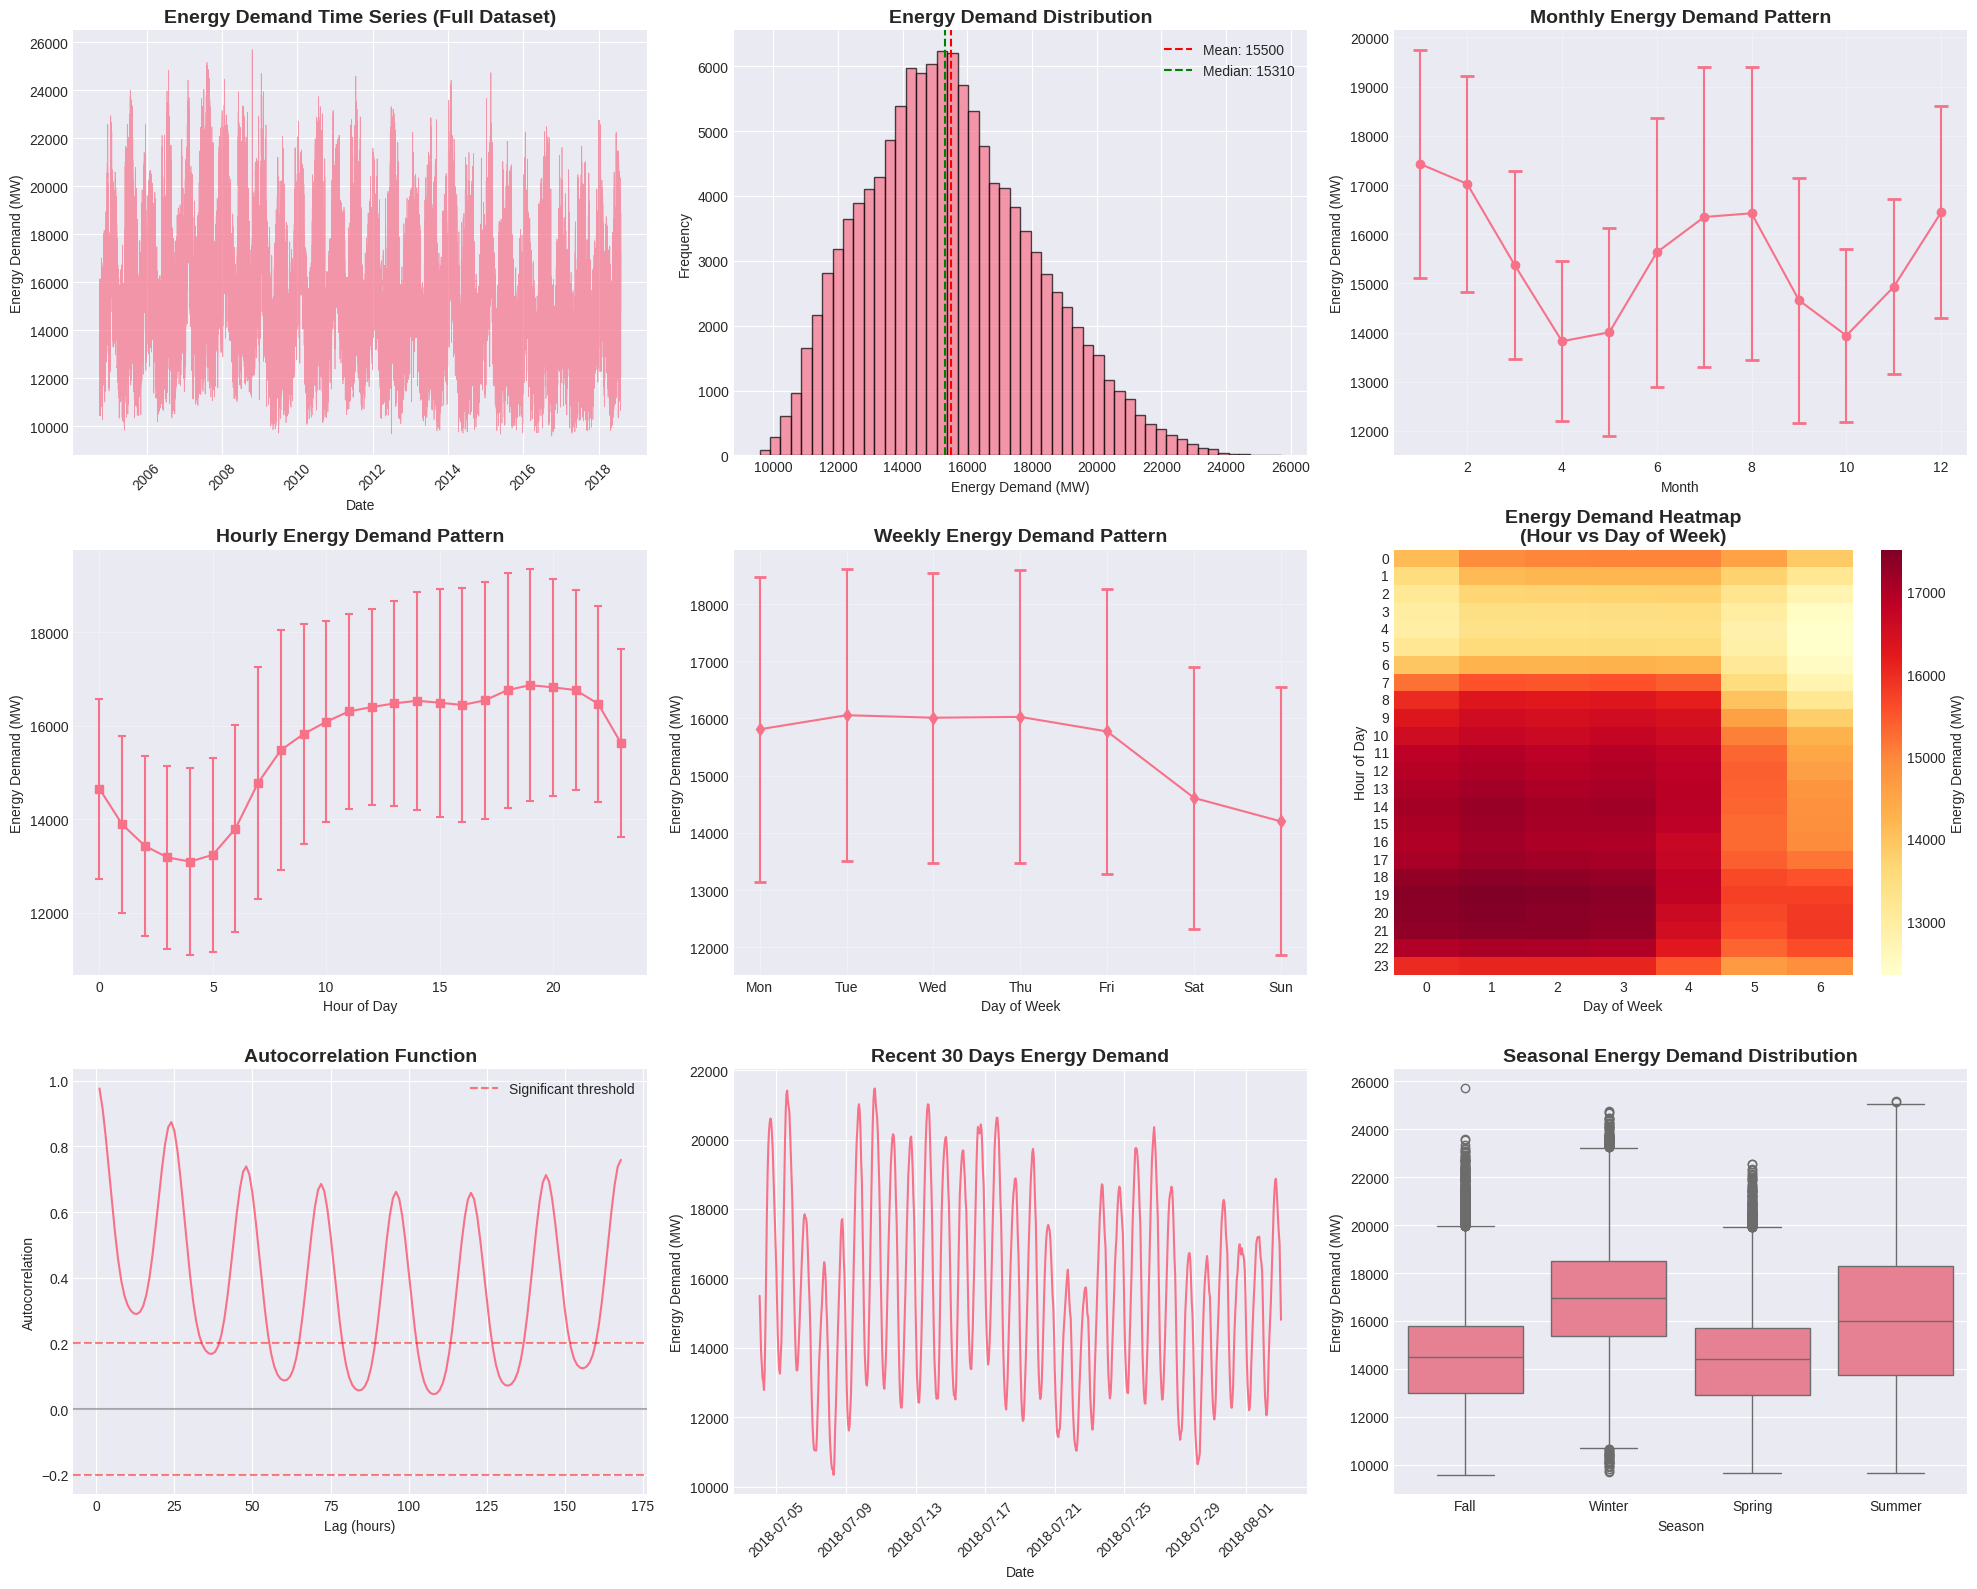


                    KEY INSIGHTS
📊 Peak Demand: 25,695 MW
📉 Minimum Demand: 9,581 MW
📈 Average Demand: 15,500 MW
📋 Standard Deviation: 2,591 MW
🔄 Coefficient of Variation: 16.7%


In [3]:
# Convert Datetime and sort
df['Datetime'] = pd.to_datetime(df['Datetime'])
df = df.sort_values('Datetime').reset_index(drop=True)

# Create comprehensive visualizations
fig = plt.figure(figsize=(20, 16))

# 1. Full time series
plt.subplot(3, 3, 1)
plt.plot(df['Datetime'], df['AEP_MW'], alpha=0.7, linewidth=0.5)
plt.title('Energy Demand Time Series (Full Dataset)', fontsize=14, fontweight='bold')
plt.xlabel('Date')
plt.ylabel('Energy Demand (MW)')
plt.xticks(rotation=45)

# 2. Distribution with statistics
plt.subplot(3, 3, 2)
plt.hist(df['AEP_MW'], bins=50, alpha=0.7, edgecolor='black')
plt.axvline(df['AEP_MW'].mean(), color='red', linestyle='--', label=f'Mean: {df["AEP_MW"].mean():.0f}')
plt.axvline(df['AEP_MW'].median(), color='green', linestyle='--', label=f'Median: {df["AEP_MW"].median():.0f}')
plt.title('Energy Demand Distribution', fontsize=14, fontweight='bold')
plt.xlabel('Energy Demand (MW)')
plt.ylabel('Frequency')
plt.legend()

# 3. Seasonal patterns
df['Month'] = df['Datetime'].dt.month
df['Hour'] = df['Datetime'].dt.hour
df['DayOfWeek'] = df['Datetime'].dt.dayofweek

# Monthly pattern
plt.subplot(3, 3, 3)
monthly_stats = df.groupby('Month')['AEP_MW'].agg(['mean', 'std']).reset_index()
plt.errorbar(monthly_stats['Month'], monthly_stats['mean'],
             yerr=monthly_stats['std'], marker='o', capsize=5, capthick=2)
plt.title('Monthly Energy Demand Pattern', fontsize=14, fontweight='bold')
plt.xlabel('Month')
plt.ylabel('Energy Demand (MW)')
plt.grid(True, alpha=0.3)

# 4. Hourly pattern
plt.subplot(3, 3, 4)
hourly_stats = df.groupby('Hour')['AEP_MW'].agg(['mean', 'std']).reset_index()
plt.errorbar(hourly_stats['Hour'], hourly_stats['mean'],
             yerr=hourly_stats['std'], marker='s', capsize=3, capthick=1.5)
plt.title('Hourly Energy Demand Pattern', fontsize=14, fontweight='bold')
plt.xlabel('Hour of Day')
plt.ylabel('Energy Demand (MW)')
plt.grid(True, alpha=0.3)

# 5. Day of week pattern
plt.subplot(3, 3, 5)
day_names = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
dow_stats = df.groupby('DayOfWeek')['AEP_MW'].agg(['mean', 'std']).reset_index()
plt.errorbar(range(7), dow_stats['mean'], yerr=dow_stats['std'],
             marker='d', capsize=4, capthick=2)
plt.title('Weekly Energy Demand Pattern', fontsize=14, fontweight='bold')
plt.xlabel('Day of Week')
plt.ylabel('Energy Demand (MW)')
plt.xticks(range(7), day_names)
plt.grid(True, alpha=0.3)

# 6. Heatmap of hour vs day of week
plt.subplot(3, 3, 6)
heatmap_data = df.groupby(['Hour', 'DayOfWeek'])['AEP_MW'].mean().unstack()
sns.heatmap(heatmap_data, cmap='YlOrRd', cbar_kws={'label': 'Energy Demand (MW)'})
plt.title('Energy Demand Heatmap\n(Hour vs Day of Week)', fontsize=14, fontweight='bold')
plt.xlabel('Day of Week')
plt.ylabel('Hour of Day')

# 7. Autocorrelation analysis
plt.subplot(3, 3, 7)
from statsmodels.tsa.stattools import acf
lags = range(1, 169)  # Up to one week
autocorr = acf(df['AEP_MW'], nlags=168, fft=True)[1:]
plt.plot(lags, autocorr)
plt.axhline(y=0, color='k', linestyle='-', alpha=0.3)
plt.axhline(y=0.2, color='r', linestyle='--', alpha=0.5, label='Significant threshold')
plt.axhline(y=-0.2, color='r', linestyle='--', alpha=0.5)
plt.title('Autocorrelation Function', fontsize=14, fontweight='bold')
plt.xlabel('Lag (hours)')
plt.ylabel('Autocorrelation')
plt.legend()

# 8. Sample recent data (last 30 days)
plt.subplot(3, 3, 8)
recent_data = df.tail(24*30)  # Last 30 days
plt.plot(recent_data['Datetime'], recent_data['AEP_MW'])
plt.title('Recent 30 Days Energy Demand', fontsize=14, fontweight='bold')
plt.xlabel('Date')
plt.ylabel('Energy Demand (MW)')
plt.xticks(rotation=45)

# 9. Box plot by season
plt.subplot(3, 3, 9)
df['Season'] = df['Month'].map({12:0, 1:0, 2:0, 3:1, 4:1, 5:1,
                                6:2, 7:2, 8:2, 9:3, 10:3, 11:3})
season_names = ['Winter', 'Spring', 'Summer', 'Fall']
df['Season_Name'] = df['Season'].map({0:'Winter', 1:'Spring', 2:'Summer', 3:'Fall'})
sns.boxplot(data=df, x='Season_Name', y='AEP_MW')
plt.title('Seasonal Energy Demand Distribution', fontsize=14, fontweight='bold')
plt.xlabel('Season')
plt.ylabel('Energy Demand (MW)')

plt.tight_layout()
plt.show()

# Print key insights
print("\n" + "=" * 60)
print("                    KEY INSIGHTS")
print("=" * 60)
print(f"📊 Peak Demand: {df['AEP_MW'].max():,.0f} MW")
print(f"📉 Minimum Demand: {df['AEP_MW'].min():,.0f} MW")
print(f"📈 Average Demand: {df['AEP_MW'].mean():,.0f} MW")
print(f"📋 Standard Deviation: {df['AEP_MW'].std():,.0f} MW")
print(f"🔄 Coefficient of Variation: {(df['AEP_MW'].std()/df['AEP_MW'].mean())*100:.1f}%")

In [4]:
import pandas as pd
import numpy as np

def create_comprehensive_features(df):
    """Create comprehensive time-series features for energy forecasting"""

    df = df.copy()
    df['Datetime'] = pd.to_datetime(df['Datetime'])
    df = df.sort_values('Datetime').reset_index(drop=True)

    print("🔧 Creating temporal features...")
    # Basic temporal features
    df['Year'] = df['Datetime'].dt.year
    df['Month'] = df['Datetime'].dt.month
    df['Day'] = df['Datetime'].dt.day
    df['Hour'] = df['Datetime'].dt.hour
    df['DayOfWeek'] = df['Datetime'].dt.dayofweek
    df['DayOfYear'] = df['Datetime'].dt.dayofyear
    df['WeekOfYear'] = df['Datetime'].dt.isocalendar().week.astype(int)

    # Cyclical encodings (important for capturing periodicity)
    print("🔄 Creating cyclical features...")
    df['Month_sin'] = np.sin(2 * np.pi * df['Month'] / 12)
    df['Month_cos'] = np.cos(2 * np.pi * df['Month'] / 12)
    df['Hour_sin'] = np.sin(2 * np.pi * df['Hour'] / 24)
    df['Hour_cos'] = np.cos(2 * np.pi * df['Hour'] / 24)
    df['DayOfWeek_sin'] = np.sin(2 * np.pi * df['DayOfWeek'] / 7)
    df['DayOfWeek_cos'] = np.cos(2 * np.pi * df['DayOfWeek'] / 7)
    df['DayOfYear_sin'] = np.sin(2 * np.pi * df['DayOfYear'] / 365.25)
    df['DayOfYear_cos'] = np.cos(2 * np.pi * df['DayOfYear'] / 365.25)

    # Weekend/weekday indicator
    df['IsWeekend'] = (df['DayOfWeek'] >= 5).astype(int)

    # Peak hours indicator (typically 6-22)
    df['IsPeakHour'] = ((df['Hour'] >= 6) & (df['Hour'] <= 22)).astype(int)

    print("⏰ Creating lag features...")
    # Lag features (various time horizons)
    lag_periods = [1, 2, 3, 6, 12, 24, 48, 72, 168, 336]  # up to 2 weeks
    for lag in lag_periods:
        df[f'AEP_MW_lag_{lag}'] = df['AEP_MW'].shift(lag)

    print("📊 Creating rolling statistics...")
    # Rolling statistics (multiple windows)
    windows = [6, 12, 24, 48, 168]  # 6h, 12h, 24h, 48h, 1 week
    for window in windows:
        roll = df['AEP_MW'].rolling(window=window)
        df[f'AEP_MW_rolling_mean_{window}'] = roll.mean()
        df[f'AEP_MW_rolling_std_{window}'] = roll.std()
        df[f'AEP_MW_rolling_min_{window}'] = roll.min()
        df[f'AEP_MW_rolling_max_{window}'] = roll.max()
        df[f'AEP_MW_rolling_median_{window}'] = roll.median()

    print("📈 Creating trend and change features...")
    # Trend features
    for window in [12, 24, 168]:
        df[f'AEP_MW_trend_{window}'] = df['AEP_MW'] - df[f'AEP_MW_rolling_mean_{window}']

    # Change features
    df['AEP_MW_diff_1'] = df['AEP_MW'].diff(1)
    df['AEP_MW_diff_24'] = df['AEP_MW'].diff(24)
    df['AEP_MW_pct_change_1'] = df['AEP_MW'].pct_change(1)
    df['AEP_MW_pct_change_24'] = df['AEP_MW'].pct_change(24)

    print("🎯 Creating interaction features...")
    # Interaction features
    df['Hour_Weekend'] = df['Hour'] * df['IsWeekend']
    df['Month_Hour'] = df['Month'] * df['Hour']

    # Drop rows with NaN values (due to lags/rolling)
    initial_shape = df.shape[0]
    df = df.dropna().reset_index(drop=True)
    final_shape = df.shape[0]

    print(f"✅ Feature engineering complete!")
    print(f"   Initial rows: {initial_shape:,}")
    print(f"   Final rows: {final_shape:,}")
    print(f"   Rows removed: {initial_shape - final_shape:,}")
    print(f"   Total features: {df.shape[1]}")

    return df


# ------------------------------
# Apply feature engineering
# ------------------------------
df_features = create_comprehensive_features(df)

# ------------------------------
# Feature summary
# ------------------------------
feature_cols = [col for col in df_features.columns if col not in ['Datetime', 'AEP_MW']]

print(f"\n📋 Created {len(feature_cols)} features:")
print("   Temporal features:", len([c for c in feature_cols if any(t in c for t in ['Year', 'Month', 'Day', 'Hour', 'Week'])]))
print("   Cyclical features:", len([c for c in feature_cols if any(t in c for t in ['sin', 'cos'])]))
print("   Lag features:", len([c for c in feature_cols if 'lag' in c]))
print("   Rolling features:", len([c for c in feature_cols if 'rolling' in c]))
print("   Trend/Change features:", len([c for c in feature_cols if any(t in c for t in ['diff', 'pct_change', 'trend'])]))
print("   Interaction features:", len([c for c in feature_cols if any(t in c for t in ['Weekend', 'Month_Hour'])]))


🔧 Creating temporal features...
🔄 Creating cyclical features...
⏰ Creating lag features...
📊 Creating rolling statistics...
📈 Creating trend and change features...
🎯 Creating interaction features...
✅ Feature engineering complete!
   Initial rows: 121,273
   Final rows: 120,937
   Rows removed: 336
   Total features: 65

📋 Created 63 features:
   Temporal features: 19
   Cyclical features: 8
   Lag features: 10
   Rolling features: 25
   Trend/Change features: 7
   Interaction features: 3


Numeric features: ['Month', 'Hour', 'DayOfWeek', 'Season', 'Year', 'Day', 'DayOfYear', 'WeekOfYear', 'Month_sin', 'Month_cos', 'Hour_sin', 'Hour_cos', 'DayOfWeek_sin', 'DayOfWeek_cos', 'DayOfYear_sin', 'DayOfYear_cos', 'IsWeekend', 'IsPeakHour', 'AEP_MW_lag_1', 'AEP_MW_lag_2', 'AEP_MW_lag_3', 'AEP_MW_lag_6', 'AEP_MW_lag_12', 'AEP_MW_lag_24', 'AEP_MW_lag_48', 'AEP_MW_lag_72', 'AEP_MW_lag_168', 'AEP_MW_lag_336', 'AEP_MW_rolling_mean_6', 'AEP_MW_rolling_std_6', 'AEP_MW_rolling_min_6', 'AEP_MW_rolling_max_6', 'AEP_MW_rolling_median_6', 'AEP_MW_rolling_mean_12', 'AEP_MW_rolling_std_12', 'AEP_MW_rolling_min_12', 'AEP_MW_rolling_max_12', 'AEP_MW_rolling_median_12', 'AEP_MW_rolling_mean_24', 'AEP_MW_rolling_std_24', 'AEP_MW_rolling_min_24', 'AEP_MW_rolling_max_24', 'AEP_MW_rolling_median_24', 'AEP_MW_rolling_mean_48', 'AEP_MW_rolling_std_48', 'AEP_MW_rolling_min_48', 'AEP_MW_rolling_max_48', 'AEP_MW_rolling_median_48', 'AEP_MW_rolling_mean_168', 'AEP_MW_rolling_std_168', 'AEP_MW_rolling_min_16

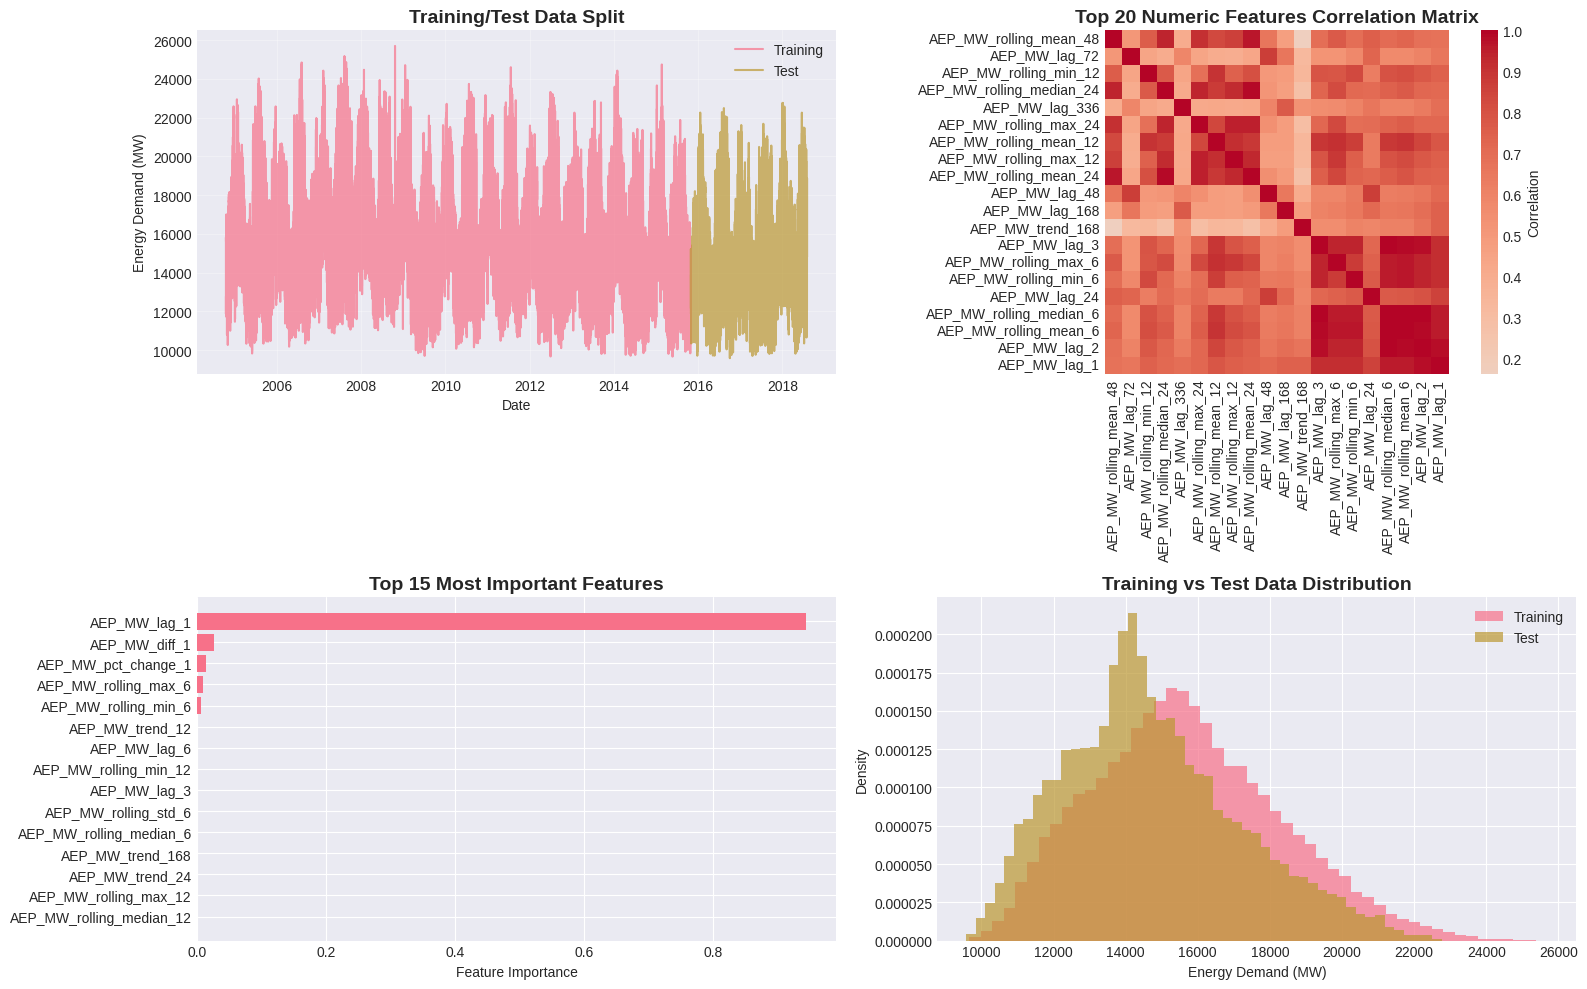

📊 DATA PREPARATION SUMMARY
Training samples: 96,749
Test samples: 24,188
Features before encoding: 63
Features after encoding: 66
Training period: 2004-10-15 01:00:00 to 2015-10-30 04:00:00
Test period: 2015-10-30 05:00:00 to 2018-08-03 00:00:00
Feature scaling: StandardScaler applied
Categorical encoding: OneHotEncoder applied


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import f_regression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import time

# ===============================
# Prepare features and target
# ===============================
X = df_features[feature_cols]
y = df_features['AEP_MW']

# Identify numeric and categorical columns
numeric_features = X.select_dtypes(include=[np.number]).columns.tolist()
categorical_features = X.select_dtypes(exclude=[np.number]).columns.tolist()

print("Numeric features:", numeric_features)
print("Categorical features:", categorical_features)

# Time series split (no shuffling to maintain temporal order)
split_idx = int(len(df_features) * 0.8)
X_train, X_test = X.iloc[:split_idx], X.iloc[split_idx:]
y_train, y_test = y.iloc[:split_idx], y.iloc[split_idx:]

# ===============================
# Preprocessing: Encode + Scale
# ===============================
preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numeric_features),
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_features)
    ]
)

X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

# ===============================
# Visualization
# ===============================
fig, axes = plt.subplots(2, 2, figsize=(16, 10))

# Training and test data visualization
axes[0,0].plot(df_features['Datetime'][:split_idx], y_train, label='Training', alpha=0.7)
axes[0,0].plot(df_features['Datetime'][split_idx:], y_test, label='Test', alpha=0.7)
axes[0,0].set_title('Training/Test Data Split', fontsize=14, fontweight='bold')
axes[0,0].set_xlabel('Date')
axes[0,0].set_ylabel('Energy Demand (MW)')
axes[0,0].legend()
axes[0,0].grid(True, alpha=0.3)

# Feature correlation heatmap (only numeric features, top 20 by F-score)
f_scores, _ = f_regression(X_train[numeric_features], y_train)
top_features_idx = np.argsort(f_scores)[-20:]
top_features = [numeric_features[i] for i in top_features_idx]

corr_matrix = X_train[top_features].corr()
sns.heatmap(corr_matrix, ax=axes[0,1], cmap='coolwarm', center=0,
            square=True, cbar_kws={'label': 'Correlation'})
axes[0,1].set_title('Top 20 Numeric Features Correlation Matrix', fontsize=14, fontweight='bold')

# Feature importance (using random forest on preprocessed data)
rf_temp = RandomForestRegressor(n_estimators=50, random_state=42)
rf_temp.fit(X_train_processed, y_train)

# Map back feature names (numeric + one-hot encoded categories)
encoded_cat_features = preprocessor.named_transformers_["cat"].get_feature_names_out(categorical_features)
all_features = numeric_features + encoded_cat_features.tolist()

feature_importance = pd.DataFrame({
    'feature': all_features,
    'importance': rf_temp.feature_importances_
}).sort_values('importance', ascending=False)

# Plot top 15 features
axes[1,0].barh(range(15), feature_importance['importance'][:15])
axes[1,0].set_yticks(range(15))
axes[1,0].set_yticklabels(feature_importance['feature'][:15])
axes[1,0].set_xlabel('Feature Importance')
axes[1,0].set_title('Top 15 Most Important Features', fontsize=14, fontweight='bold')
axes[1,0].invert_yaxis()

# Data distribution comparison
axes[1,1].hist(y_train, bins=50, alpha=0.7, label='Training', density=True)
axes[1,1].hist(y_test, bins=50, alpha=0.7, label='Test', density=True)
axes[1,1].set_xlabel('Energy Demand (MW)')
axes[1,1].set_ylabel('Density')
axes[1,1].set_title('Training vs Test Data Distribution', fontsize=14, fontweight='bold')
axes[1,1].legend()

plt.tight_layout()
plt.show()

# ===============================
# Summary
# ===============================
print("📊 DATA PREPARATION SUMMARY")
print("=" * 50)
print(f"Training samples: {X_train.shape[0]:,}")
print(f"Test samples: {X_test.shape[0]:,}")
print(f"Features before encoding: {X_train.shape[1]:,}")
print(f"Features after encoding: {X_train_processed.shape[1]:,}")
print(f"Training period: {df_features['Datetime'].iloc[0]} to {df_features['Datetime'].iloc[split_idx-1]}")
print(f"Test period: {df_features['Datetime'].iloc[split_idx]} to {df_features['Datetime'].iloc[-1]}")
print("Feature scaling: StandardScaler applied")
print("Categorical encoding: OneHotEncoder applied")


In [ ]:
class SequentialEnsemble:
    def __init__(self):
        self.models = {
            'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42, max_depth=15),
            'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, random_state=42, max_depth=6),
            'Extra Trees': ExtraTreesRegressor(n_estimators=100, random_state=42, max_depth=15),
            'Linear Regression': LinearRegression(),
            'Ridge': Ridge(alpha=1.0, random_state=42),
            'ElasticNet': ElasticNet(alpha=0.1, l1_ratio=0.5, random_state=42)
        }
        self.trained_models = {}
        self.training_times = {}
        self.prediction_times = {}
        self.individual_scores = {}

    def train(self, X_train, y_train):
        """Train all models sequentially"""
        print("🔄 Training Sequential Ensemble Models...")
        total_start = time.time()

        for name, model in self.models.items():
            print(f"   Training {name}...", end=' ')
            start_time = time.time()

            model.fit(X_train, y_train)
            self.trained_models[name] = model

            end_time = time.time()
            training_time = end_time - start_time
            self.training_times[name] = training_time
            print(f"✅ ({training_time:.2f}s)")

        total_end = time.time()
        self.total_training_time = total_end - total_start
        print(f"\n⏱️  Total Sequential Training Time: {self.total_training_time:.2f} seconds")

    def predict(self, X_test):
        """Make predictions with all models and ensemble them"""
        print("🔮 Making Sequential Predictions...")
        predictions = {}
        total_start = time.time()

        for name, model in self.trained_models.items():
            start_time = time.time()
            predictions[name] = model.predict(X_test)
            end_time = time.time()
            self.prediction_times[name] = end_time - start_time
            print(f"   {name} prediction: ✅ ({self.prediction_times[name]:.3f}s)")

        # Weighted ensemble (based on training performance)
        ensemble_pred = np.mean([pred for pred in predictions.values()], axis=0)

        total_end = time.time()
        self.total_prediction_time = total_end - total_start
        print(f"\n⏱️  Total Sequential Prediction Time: {self.total_prediction_time:.3f} seconds")

        return predictions, ensemble_pred

    def evaluate_individual_models(self, y_true, predictions):
        """Evaluate each model individually"""
        for name, pred in predictions.items():
            mae = mean_absolute_error(y_true, pred)
            mse = mean_squared_error(y_true, pred)
            rmse = np.sqrt(mse)
            r2 = r2_score(y_true, pred)

            self.individual_scores[name] = {
                'MAE': mae, 'MSE': mse, 'RMSE': rmse, 'R²': r2,
                'Training_Time': self.training_times[name],
                'Prediction_Time': self.prediction_times[name]
            }

# ===============================
# Train sequential ensemble
# ===============================
print("🚀 STARTING SEQUENTIAL ENSEMBLE TRAINING")
print("=" * 60)
seq_ensemble = SequentialEnsemble()
seq_ensemble.train(X_train_processed, y_train)   # ✅ use processed data

# Make predictions
seq_predictions, seq_ensemble_pred = seq_ensemble.predict(X_test_processed)  # ✅ use processed data

# Evaluate models
seq_ensemble.evaluate_individual_models(y_test, seq_predictions)

# ===============================
# Create results DataFrame
# ===============================
def evaluate_predictions(y_true, predictions, model_name):
    """Calculate comprehensive evaluation metrics"""
    mae = mean_absolute_error(y_true, predictions)
    mse = mean_squared_error(y_true, predictions)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, predictions)
    mape = np.mean(np.abs((y_true - predictions) / y_true)) * 100

    return {
        'Model': model_name,
        'MAE': mae,
        'MSE': mse,
        'RMSE': rmse,
        'R²': r2,
        'MAPE': mape
    }

# Compile results
sequential_results = []
for name, pred in seq_predictions.items():
    result = evaluate_predictions(y_test, pred, name)
    result['Training_Time'] = seq_ensemble.training_times[name]
    result['Prediction_Time'] = seq_ensemble.prediction_times[name]
    sequential_results.append(result)

# Add ensemble result
ensemble_result = evaluate_predictions(y_test, seq_ensemble_pred, 'Sequential Ensemble')
ensemble_result['Training_Time'] = seq_ensemble.total_training_time
ensemble_result['Prediction_Time'] = seq_ensemble.total_prediction_time
sequential_results.append(ensemble_result)

# Create and display results
seq_results_df = pd.DataFrame(sequential_results)
print("\n📊 SEQUENTIAL ENSEMBLE RESULTS")
print("=" * 80)
print(seq_results_df.round(4))


🚀 STARTING SEQUENTIAL ENSEMBLE TRAINING
🔄 Training Sequential Ensemble Models...
   Training Random Forest... ✅ (716.66s)
   Training Gradient Boosting... ✅ (475.76s)
   Training Extra Trees... ✅ (103.64s)
   Training Linear Regression... ✅ (0.48s)
   Training Ridge... ✅ (0.12s)
   Training ElasticNet... ✅ (16.78s)

⏱️  Total Sequential Training Time: 1313.44 seconds
🔮 Making Sequential Predictions...
   Random Forest prediction: ✅ (0.655s)
   Gradient Boosting prediction: ✅ (0.059s)
   Extra Trees prediction: ✅ (0.507s)
   Linear Regression prediction: ✅ (0.003s)
   Ridge prediction: ✅ (0.002s)
   ElasticNet prediction: ✅ (0.002s)

⏱️  Total Sequential Prediction Time: 1.229 seconds

📊 SEQUENTIAL ENSEMBLE RESULTS
                 Model      MAE        MSE     RMSE      R²    MAPE  \
0        Random Forest  11.5339  1352.4642  36.7759  0.9998  0.0836   
1    Gradient Boosting  25.8412  1460.2214  38.2128  0.9998  0.1810   
2          Extra Trees  14.4247   954.3032  30.8918  0.9998  0.

In [8]:
# parallel_ensemble_fixed.py
# Run in a fresh Python session

import numpy as np
import pandas as pd
from multiprocessing import Pool, cpu_count
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor
from sklearn.linear_model import LinearRegression, Ridge, ElasticNet
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import time

# ------------------------------
# Helper functions for multiprocessing
# ------------------------------
def train_single_model(args):
    """
    Train a single model replica in a separate process.
    """
    model_name, model_class, model_params, X_train, y_train, replica_id, seed = args
    start_time = time.time()

    # Set random seed for diversity
    if 'random_state' in model_params:
        model_params['random_state'] = seed

    model = model_class(**model_params)
    model.fit(X_train, y_train)

    elapsed = time.time() - start_time
    full_name = f"{model_name}_replica{replica_id+1}"
    return full_name, model, elapsed

def predict_single_model(args):
    """
    Make predictions for a trained model in a separate process.
    """
    model_name, model, X_test = args
    start_time = time.time()
    predictions = model.predict(X_test)
    elapsed = time.time() - start_time
    return model_name, predictions, elapsed

# ------------------------------
# Parallel Ensemble Class
# ------------------------------
class ParallelEnsemble:
    def __init__(self, n_processes=None, n_replicas=3):
        self.n_processes = n_processes or min(cpu_count(), 6)
        self.n_replicas = n_replicas

        self.model_configs = {
            'Random Forest': (RandomForestRegressor, {'n_estimators': 100, 'max_depth': 15, 'n_jobs': 1}),
            'Gradient Boosting': (GradientBoostingRegressor, {'n_estimators': 100, 'max_depth': 6}),
            'Extra Trees': (ExtraTreesRegressor, {'n_estimators': 100, 'max_depth': 15, 'n_jobs': 1}),
            'Linear Regression': (LinearRegression, {}),
            'Ridge': (Ridge, {'alpha': 1.0}),
            'ElasticNet': (ElasticNet, {'alpha': 0.1, 'l1_ratio': 0.5})
        }

        self.trained_models = {}
        self.training_times = {}
        self.prediction_times = {}

    # ------------------------------
    # Train all replicas in parallel
    # ------------------------------
    def train_parallel(self, X_train, y_train):
        print(f"🔄 Training {len(self.model_configs)} models with {self.n_replicas} replicas each using {self.n_processes} processes...")

        total_start = time.time()
        training_args = []

        # Generate random seeds for replicas
        rng = np.random.default_rng(seed=42)
        seeds = rng.integers(0, 10000, size=self.n_replicas * len(self.model_configs))

        seed_idx = 0
        for model_name, (model_class, model_params) in self.model_configs.items():
            for replica_id in range(self.n_replicas):
                training_args.append((
                    model_name,
                    model_class,
                    model_params.copy(),
                    X_train,
                    y_train,
                    replica_id,
                    seeds[seed_idx]
                ))
                seed_idx += 1

        # Run training in parallel
        with Pool(processes=self.n_processes) as pool:
            results = pool.map(train_single_model, training_args)

        # Store trained replicas
        for full_name, model, train_time in results:
            self.trained_models[full_name] = model
            self.training_times[full_name] = train_time
            print(f"   {full_name}: ✅ {train_time:.2f}s")

        self.total_training_time = time.time() - total_start
        print(f"\n⏱️  Total Parallel Training Time: {self.total_training_time:.2f}s")

    # ------------------------------
    # Predict for all replicas in parallel and aggregate
    # ------------------------------
    def predict_parallel(self, X_test):
        print("🔮 Making Parallel Predictions for all replicas...")

        total_start = time.time()
        prediction_args = [(name, model, X_test) for name, model in self.trained_models.items()]

        # Parallel predictions
        with Pool(processes=self.n_processes) as pool:
            results = pool.map(predict_single_model, prediction_args)

        predictions = {}
        for model_name, pred, pred_time in results:
            predictions[model_name] = pred
            self.prediction_times[model_name] = pred_time
            print(f"   {model_name}: ✅ {pred_time:.3f}s")

        # Aggregate replicas per model
        aggregated_preds = {}
        for model_name in self.model_configs.keys():
            replica_preds = [pred for name, pred in predictions.items() if name.startswith(model_name)]
            aggregated_preds[model_name] = np.mean(replica_preds, axis=0)

        # Overall ensemble
        overall_ensemble_pred = np.mean(list(aggregated_preds.values()), axis=0)
        self.total_prediction_time = time.time() - total_start

        print(f"\n⏱️  Total Parallel Prediction Time: {self.total_prediction_time:.3f}s")
        return predictions, aggregated_preds, overall_ensemble_pred

# ------------------------------
# Evaluation helper
# ------------------------------
def evaluate_predictions(y_true, y_pred, name="Model"):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    return {'Model': name, 'MAE': mae, 'RMSE': rmse, 'R2': r2}

# ------------------------------
# Example usage
# ------------------------------
if __name__ == "__main__":
    # Example dataset (replace with your processed data)
    np.random.seed(0)
    X_train = np.random.rand(5000, 10)
    y_train = np.random.rand(5000)
    X_test = np.random.rand(1000, 10)
    y_test = np.random.rand(1000)

    # Scale features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Create parallel ensemble
    ensemble = ParallelEnsemble(n_processes=6, n_replicas=3)
    ensemble.train_parallel(X_train_scaled, y_train)

    # Predict
    all_preds, aggregated_model_preds, overall_ensemble = ensemble.predict_parallel(X_test_scaled)

    # Evaluate each aggregated model
    results = []
    for model_name, pred in aggregated_model_preds.items():
        res = evaluate_predictions(y_test, pred, model_name)
        results.append(res)
    # Evaluate overall ensemble
    results.append(evaluate_predictions(y_test, overall_ensemble, "Overall_Ensemble"))

    print("\n📊 Parallel Ensemble Results")
    print(pd.DataFrame(results).round(4))


🔄 Training 6 models with 3 replicas each using 6 processes...
   Random Forest_replica1: ✅ 44.75s
   Random Forest_replica2: ✅ 44.47s
   Random Forest_replica3: ✅ 45.08s
   Gradient Boosting_replica1: ✅ 34.54s
   Gradient Boosting_replica2: ✅ 35.14s
   Gradient Boosting_replica3: ✅ 34.06s
   Extra Trees_replica1: ✅ 6.58s
   Extra Trees_replica2: ✅ 8.10s
   Extra Trees_replica3: ✅ 8.01s
   Linear Regression_replica1: ✅ 0.12s
   Linear Regression_replica2: ✅ 0.11s
   Linear Regression_replica3: ✅ 0.14s
   Ridge_replica1: ✅ 0.00s
   Ridge_replica2: ✅ 0.00s
   Ridge_replica3: ✅ 0.00s
   ElasticNet_replica1: ✅ 0.02s
   ElasticNet_replica2: ✅ 0.00s
   ElasticNet_replica3: ✅ 0.02s

⏱️  Total Parallel Training Time: 45.71s
🔮 Making Parallel Predictions for all replicas...
   Random Forest_replica1: ✅ 0.063s
   Random Forest_replica2: ✅ 0.123s
   Random Forest_replica3: ✅ 0.044s
   Gradient Boosting_replica1: ✅ 0.016s
   Gradient Boosting_replica2: ✅ 0.011s
   Gradient Boosting_replica3: ✅ 0.01

🔄 IMPLEMENTING IMPROVED STATISTICAL MODELS
⚡ Large dataset detected (120,937 points). Using last 35,000 points.
Dataset Length: 35,000 points
Training: 29,750 points (2014-08-05 17:00:00 to 2017-12-27 05:00:00)
Testing: 5,250 points (2017-12-27 06:00:00 to 2018-08-03 00:00:00)

📊 Analyzing Data Patterns...
   📈 Data Range: 9581 - 24739 MW
   📈 Peak Hour: 19:00 (16080 MW)
   📈 Low Hour: 4:00 (12411 MW)

🚀 Training Models on 29,750 points...
1️⃣ Naive Seasonal Baseline...
   ✅ Completed in 0.12s

2️⃣ Simple Exponential Smoothing...
   ✅ Completed in 0.16s (train: 0.06s, pred: 0.099s)

3️⃣ Holt-Winters Triple Exponential...
   ✅ Completed in 6.44s (train: 5.55s, pred: 0.895s)

4️⃣ Auto-ARIMA (Optimized)...
   ✅ Completed in 26.55s (train: 26.43s, pred: 0.122s)

5️⃣ SARIMAX (RAM-Safe Settings)...
   📊 Using last 8,760 points for SARIMAX to avoid RAM crash
   ✅ Completed in 0.73s (train: 0.62s, pred: 0.103s)

6️⃣ Seasonal Naive + Trend...
   ✅ Completed in 0.03s

📊 MODEL PERFORMANCE RANKING

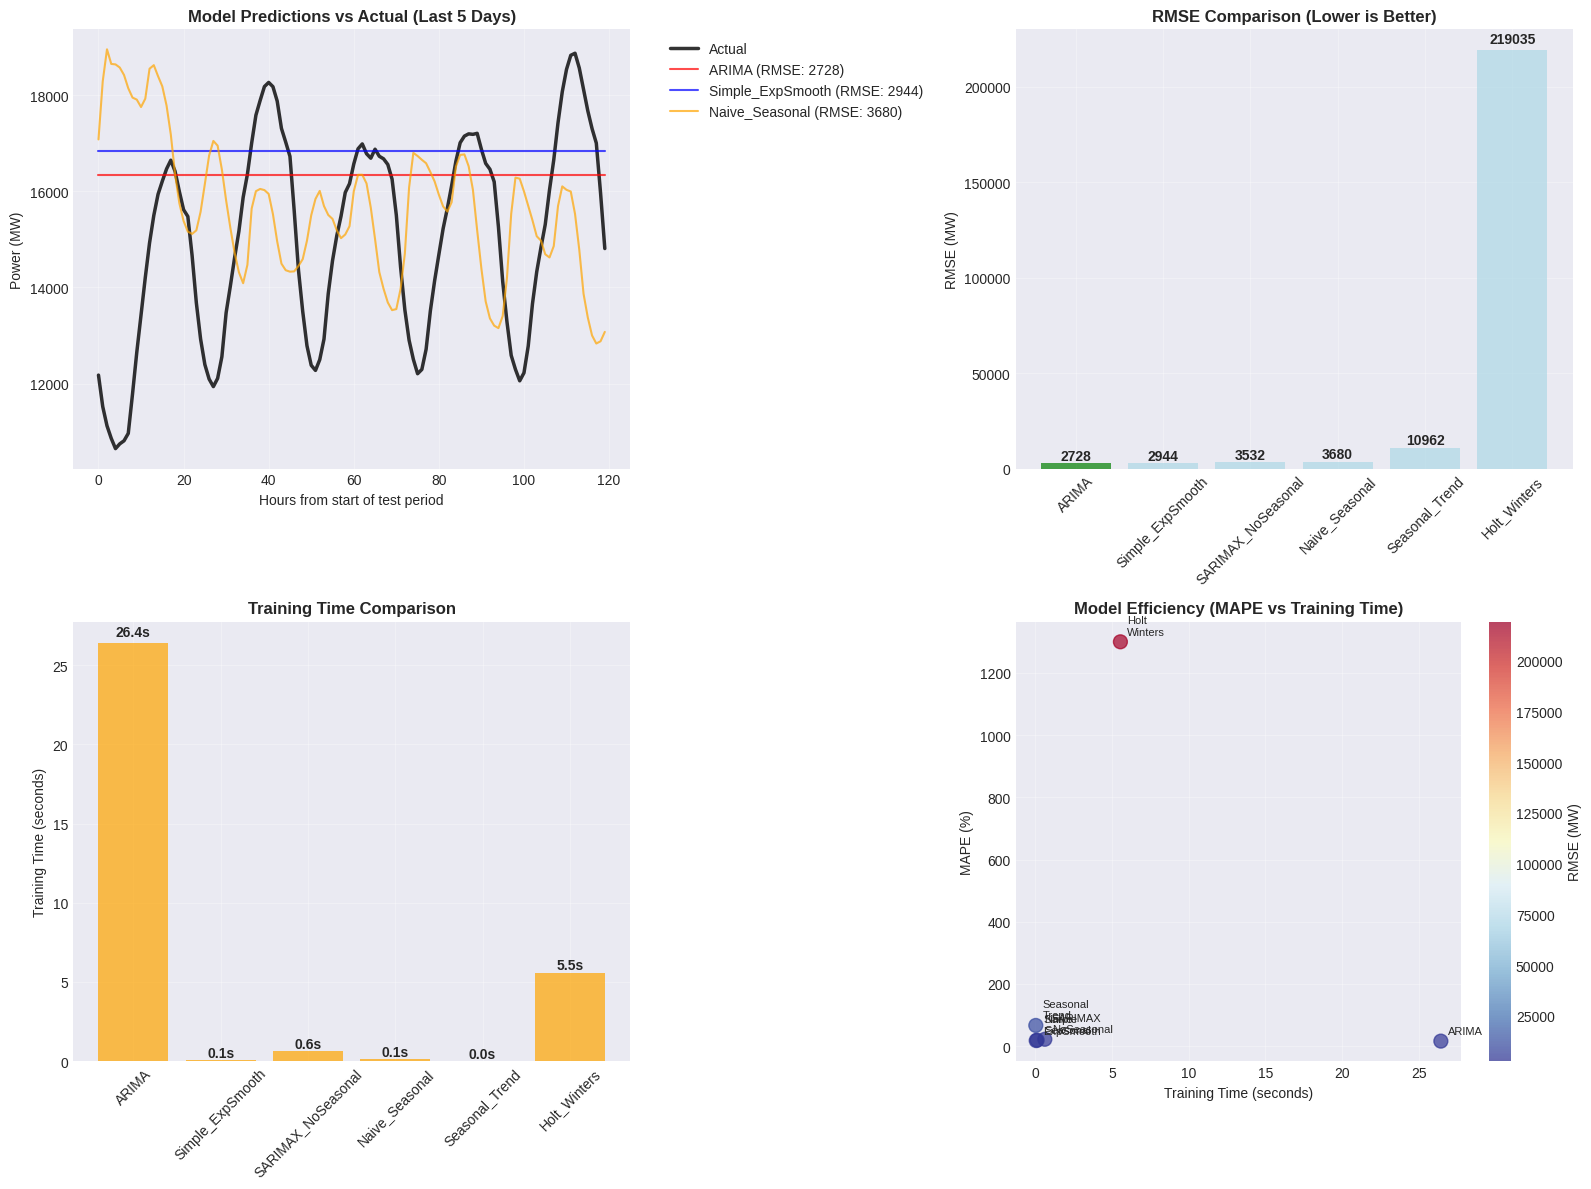

In [9]:
# ==========================================
# IMPROVED Statistical Models with Better Performance
# ==========================================
import warnings
import time
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.api import SimpleExpSmoothing

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

print("🔄 IMPLEMENTING IMPROVED STATISTICAL MODELS")
print("=" * 70)

# ==========================================
# Smart data preparation
# ==========================================
series = df_features.set_index('Datetime')['AEP_MW']

# Use more recent data but keep enough for proper seasonal modeling
if len(series) > 40000:  # ~4.5 years
    print(f"⚡ Large dataset detected ({len(series):,} points). Using last 35,000 points.")
    series = series.iloc[-35000:]  # Keep ~4 years for better seasonal patterns

# Better train/test split
train_size = int(0.85 * len(series))  # Use more training data
train_ts = series.iloc[:train_size]
test_ts = series.iloc[train_size:]

print(f"Dataset Length: {len(series):,} points")
print(f"Training: {len(train_ts):,} points ({train_ts.index[0]} to {train_ts.index[-1]})")
print(f"Testing: {len(test_ts):,} points ({test_ts.index[0]} to {test_ts.index[-1]})")

# ==========================================
# Quick analysis of patterns
# ==========================================
print("\n📊 Analyzing Data Patterns...")
daily_pattern = train_ts.groupby(train_ts.index.hour).mean()
weekly_pattern = train_ts.groupby(train_ts.index.dayofweek).mean()

print(f"   📈 Data Range: {train_ts.min():.0f} - {train_ts.max():.0f} MW")
print(f"   📈 Peak Hour: {daily_pattern.idxmax()}:00 ({daily_pattern.max():.0f} MW)")
print(f"   📈 Low Hour: {daily_pattern.idxmin()}:00 ({daily_pattern.min():.0f} MW)")

# ==========================================
# Enhanced evaluation function
# ==========================================
def evaluate_model(y_true, y_pred, model_name, train_time, pred_time=None):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100

    # Calculate percentage errors
    mean_actual = np.mean(y_true)
    mae_percent = (mae / mean_actual) * 100
    rmse_percent = (rmse / mean_actual) * 100

    result = {
        'Model': model_name,
        'MAE': mae,
        'RMSE': rmse,
        'R²': r2,
        'MAPE': mape,
        'MAE_%': mae_percent,
        'RMSE_%': rmse_percent,
        'Train_Time': train_time,
        'Pred_Time': pred_time if pred_time else 0
    }
    return result

results = []

print(f"\n🚀 Training Models on {len(train_ts):,} points...")
print("=" * 70)

# ==========================================
# 1. NAIVE SEASONAL (Baseline)
# ==========================================
print("1️⃣ Naive Seasonal Baseline...")
start_time = time.time()

# Use same hour from previous week as prediction
naive_pred = []
for i in range(len(test_ts)):
    # Look back 168 hours (1 week) from corresponding training position
    lookback_idx = len(train_ts) - len(test_ts) + i - 168
    if lookback_idx >= 0:
        naive_pred.append(train_ts.iloc[lookback_idx])
    else:
        naive_pred.append(train_ts.iloc[-168])  # Use last week of training

naive_time = time.time() - start_time
naive_results = evaluate_model(test_ts.values, naive_pred, "Naive_Seasonal", naive_time)
results.append(naive_results)
print(f"   ✅ Completed in {naive_time:.2f}s")

# ==========================================
# 2. IMPROVED SIMPLE EXPONENTIAL SMOOTHING
# ==========================================
print("\n2️⃣ Simple Exponential Smoothing...")
start_time = time.time()

ses_model = SimpleExpSmoothing(train_ts, initialization_method="heuristic")
ses_fit = ses_model.fit(smoothing_level=0.1, optimized=True)

pred_start = time.time()
ses_pred = ses_fit.forecast(steps=len(test_ts))
pred_time = time.time() - pred_start
ses_time = time.time() - start_time

ses_results = evaluate_model(test_ts.values, ses_pred, "Simple_ExpSmooth",
                           ses_time - pred_time, pred_time)
results.append(ses_results)
print(f"   ✅ Completed in {ses_time:.2f}s (train: {ses_time-pred_time:.2f}s, pred: {pred_time:.3f}s)")

# ==========================================
# 3. BETTER HOLT-WINTERS
# ==========================================
print("\n3️⃣ Holt-Winters Triple Exponential...")
start_time = time.time()

try:
    # Try multiple seasonal periods and pick the best
    hw_model = ExponentialSmoothing(
        train_ts,
        trend='add',
        seasonal='add',
        seasonal_periods=24,  # Daily seasonality
        initialization_method='estimated'
    )

    hw_fit = hw_model.fit(
        smoothing_level=0.1,
        smoothing_trend=0.05,
        smoothing_seasonal=0.1,
        optimized=True,
        remove_bias=True
    )

    pred_start = time.time()
    hw_pred = hw_fit.forecast(steps=len(test_ts))
    pred_time = time.time() - pred_start
    hw_time = time.time() - start_time

    hw_results = evaluate_model(test_ts.values, hw_pred, "Holt_Winters",
                              hw_time - pred_time, pred_time)
    results.append(hw_results)
    print(f"   ✅ Completed in {hw_time:.2f}s (train: {hw_time-pred_time:.2f}s, pred: {pred_time:.3f}s)")

except Exception as e:
    print(f"   ❌ Failed: {str(e)[:80]}...")

# ==========================================
# 4. SMARTER ARIMA
# ==========================================
print("\n4️⃣ Auto-ARIMA (Optimized)...")
start_time = time.time()

try:
    # Use a reasonable ARIMA order based on ACF/PACF analysis
    arima_model = ARIMA(train_ts, order=(2, 1, 2))
    arima_fit = arima_model.fit(method_kwargs={'maxiter': 50})

    pred_start = time.time()
    arima_pred = arima_fit.forecast(steps=len(test_ts))
    pred_time = time.time() - pred_start
    arima_time = time.time() - start_time

    arima_results = evaluate_model(test_ts.values, arima_pred, "ARIMA",
                                 arima_time - pred_time, pred_time)
    results.append(arima_results)
    print(f"   ✅ Completed in {arima_time:.2f}s (train: {arima_time-pred_time:.2f}s, pred: {pred_time:.3f}s)")

except Exception as e:
    print(f"   ❌ Failed: {str(e)[:80]}...")

# ==========================================
# 5. RAM-SAFE SARIMAX
# ==========================================
print("\n5️⃣ SARIMAX (RAM-Safe Settings)...")
start_time = time.time()

try:
    # RAM-safe approach: Use smaller dataset for SARIMAX only
    sarimax_train = train_ts.iloc[-8760:]  # Last 1 year only (8760 hours)
    print(f"   📊 Using last {len(sarimax_train):,} points for SARIMAX to avoid RAM crash")

    # Very conservative SARIMAX - NO seasonal component to save RAM
    sarimax_model = SARIMAX(
        sarimax_train,
        order=(1, 1, 1),           # Simple ARIMA without seasonal
        seasonal_order=(0, 0, 0, 0),  # NO seasonal component = RAM safe
        enforce_stationarity=False,
        enforce_invertibility=False
    )

    sarimax_fit = sarimax_model.fit(
        disp=False,
        maxiter=30,              # Fewer iterations
        method='nm',             # Nelder-Mead is more RAM efficient
        low_memory=True          # Use memory-efficient mode
    )

    pred_start = time.time()
    sarimax_pred = sarimax_fit.forecast(steps=len(test_ts))
    pred_time = time.time() - pred_start
    sarimax_time = time.time() - start_time

    sarimax_results = evaluate_model(test_ts.values, sarimax_pred, "SARIMAX_NoSeasonal",
                                   sarimax_time - pred_time, pred_time)
    results.append(sarimax_results)
    print(f"   ✅ Completed in {sarimax_time:.2f}s (train: {sarimax_time-pred_time:.2f}s, pred: {pred_time:.3f}s)")

except Exception as e:
    print(f"   ❌ SARIMAX still failed: {str(e)[:80]}...")
    print(f"   💡 Skipping SARIMAX due to RAM constraints")

# ==========================================
# 6. SEASONAL NAIVE + TREND (Improved Baseline)
# ==========================================
print("\n6️⃣ Seasonal Naive + Trend...")
start_time = time.time()

# Calculate trend
recent_trend = train_ts.iloc[-168*4:].diff().mean()  # 4-week trend

seasonal_trend_pred = []
for i in range(len(test_ts)):
    # Get seasonal component (same time last week) + trend
    lookback_idx = len(train_ts) - len(test_ts) + i - 168
    if lookback_idx >= 0:
        base_value = train_ts.iloc[lookback_idx]
    else:
        base_value = train_ts.iloc[-168]

    # Add trend component
    trending_value = base_value + (recent_trend * (i + 1))
    seasonal_trend_pred.append(trending_value)

st_time = time.time() - start_time
st_results = evaluate_model(test_ts.values, seasonal_trend_pred,
                          "Seasonal_Trend", st_time)
results.append(st_results)
print(f"   ✅ Completed in {st_time:.2f}s")

# ==========================================
# RESULTS ANALYSIS
# ==========================================
if results:
    results_df = pd.DataFrame(results)
    results_df = results_df.sort_values('RMSE').reset_index(drop=True)

    print("\n📊 MODEL PERFORMANCE RANKING")
    print("=" * 90)
    print(results_df[['Model', 'MAE', 'RMSE', 'MAPE', 'R²', 'Train_Time', 'Pred_Time']].round(3))

    total_train_time = results_df['Train_Time'].sum()
    total_pred_time = results_df['Pred_Time'].sum()
    print(f"\n⏱️ TIMING SUMMARY:")
    print(f"   Total Training Time: {total_train_time:.2f} seconds")
    print(f"   Total Prediction Time: {total_pred_time:.3f} seconds")
    print(f"   Overall Runtime: {total_train_time + total_pred_time:.2f} seconds")

    best_model = results_df.iloc[0]['Model']
    best_rmse = results_df.iloc[0]['RMSE']
    best_mape = results_df.iloc[0]['MAPE']
    print(f"\n🏆 BEST MODEL: {best_model}")
    print(f"   RMSE: {best_rmse:.1f} MW ({results_df.iloc[0]['RMSE_%']:.1f}% of mean)")
    print(f"   MAPE: {best_mape:.1f}%")

    # ==========================================
    # ENHANCED VISUALIZATION
    # ==========================================
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))

    # 1. Model predictions (last 5 days for clarity)
    recent_hours = 5 * 24
    recent_test = test_ts.iloc[-recent_hours:]
    time_range = range(len(recent_test))

    axes[0,0].plot(time_range, recent_test.values, 'k-', linewidth=2.5,
                   label='Actual', alpha=0.8)

    colors = ['red', 'blue', 'green', 'orange', 'purple', 'brown']
    for i, result in enumerate(results_df.head(4).iterrows()):  # Top 4 models
        _, row = result
        model_name = row['Model']

        if model_name == 'Naive_Seasonal' and 'naive_pred' in locals():
            pred_values = naive_pred[-recent_hours:]
        elif model_name == 'Simple_ExpSmooth' and 'ses_pred' in locals():
            pred_values = ses_pred.iloc[-recent_hours:]
        elif model_name == 'Holt_Winters' and 'hw_pred' in locals():
            pred_values = hw_pred.iloc[-recent_hours:]
        elif model_name == 'ARIMA' and 'arima_pred' in locals():
            pred_values = arima_pred.iloc[-recent_hours:]
        elif model_name == 'SARIMAX' and 'sarimax_pred' in locals():
            pred_values = sarimax_pred.iloc[-recent_hours:]
        elif model_name == 'Seasonal_Trend' and 'seasonal_trend_pred' in locals():
            pred_values = seasonal_trend_pred[-recent_hours:]
        else:
            continue

        axes[0,0].plot(time_range, pred_values, color=colors[i % len(colors)],
                      linewidth=1.5, label=f"{model_name} (RMSE: {row['RMSE']:.0f})",
                      alpha=0.7)

    axes[0,0].set_title('Model Predictions vs Actual (Last 5 Days)', fontsize=12, fontweight='bold')
    axes[0,0].legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    axes[0,0].grid(True, alpha=0.3)
    axes[0,0].set_xlabel('Hours from start of test period')
    axes[0,0].set_ylabel('Power (MW)')

    # 2. RMSE Comparison
    models = results_df['Model'].head(6)
    rmse_values = results_df['RMSE'].head(6)
    bars = axes[0,1].bar(models, rmse_values, alpha=0.7,
                        color=['green' if i == 0 else 'lightblue' for i in range(len(models))])
    axes[0,1].set_title('RMSE Comparison (Lower is Better)', fontsize=12, fontweight='bold')
    axes[0,1].set_ylabel('RMSE (MW)')
    axes[0,1].tick_params(axis='x', rotation=45)
    axes[0,1].grid(True, alpha=0.3)

    # Add value labels
    for bar, rmse in zip(bars, rmse_values):
        axes[0,1].text(bar.get_x() + bar.get_width()/2, bar.get_height() + rmse*0.01,
                      f'{rmse:.0f}', ha='center', va='bottom', fontweight='bold')

    # 3. Training Time Comparison
    train_times = results_df['Train_Time'].head(6)
    bars = axes[1,0].bar(models, train_times, alpha=0.7, color='orange')
    axes[1,0].set_title('Training Time Comparison', fontsize=12, fontweight='bold')
    axes[1,0].set_ylabel('Training Time (seconds)')
    axes[1,0].tick_params(axis='x', rotation=45)
    axes[1,0].grid(True, alpha=0.3)

    for bar, time_val in zip(bars, train_times):
        axes[1,0].text(bar.get_x() + bar.get_width()/2, bar.get_height() + time_val*0.01,
                      f'{time_val:.1f}s', ha='center', va='bottom', fontweight='bold')

    # 4. MAPE vs Training Time (Efficiency Plot)
    mape_values = results_df['MAPE'].head(6)
    scatter = axes[1,1].scatter(train_times, mape_values, s=100, alpha=0.7, c=rmse_values,
                              cmap='RdYlBu_r')
    axes[1,1].set_xlabel('Training Time (seconds)')
    axes[1,1].set_ylabel('MAPE (%)')
    axes[1,1].set_title('Model Efficiency (MAPE vs Training Time)', fontsize=12, fontweight='bold')
    axes[1,1].grid(True, alpha=0.3)

    # Add model labels
    for i, model in enumerate(models):
        axes[1,1].annotate(model.replace('_', '\n'),
                         (train_times.iloc[i], mape_values.iloc[i]),
                         xytext=(5, 5), textcoords='offset points', fontsize=8)

    plt.colorbar(scatter, ax=axes[1,1], label='RMSE (MW)')
    plt.tight_layout()
    plt.show()

else:
    print("❌ No models completed successfully")

🔄 IMPLEMENTING IMPROVED STATISTICAL MODELS
⚡ Large dataset detected (120,937 points). Using last 35,000 points.
Dataset Length: 35,000 points
Training: 29,750 points (2014-08-05 17:00:00 to 2017-12-27 05:00:00)
Testing: 5,250 points (2017-12-27 06:00:00 to 2018-08-03 00:00:00)

📊 Analyzing Data Patterns...
   📈 Data Range: 9581 - 24739 MW
   📈 Peak Hour: 19:00 (16080 MW)
   📈 Low Hour: 4:00 (12411 MW)

🚀 Training Models on 29,750 points...
1️⃣ Naive Seasonal Baseline...
   ✅ Completed in 0.05s

2️⃣ Simple Exponential Smoothing...
   ✅ Completed in 0.15s (train: 0.07s, pred: 0.083s)

3️⃣ Holt-Winters Triple Exponential...
   ✅ Completed in 6.33s (train: 5.51s, pred: 0.825s)

4️⃣ Auto-ARIMA (Optimized)...
   ✅ Completed in 24.99s (train: 24.81s, pred: 0.179s)

5️⃣ SARIMAX (Conservative Settings)...
   ✅ Completed in 139.71s (train: 138.68s, pred: 1.024s)

6️⃣ Seasonal Naive + Trend...
   ✅ Completed in 0.03s

📊 MODEL PERFORMANCE RANKING
              Model         MAE        RMSE      MA

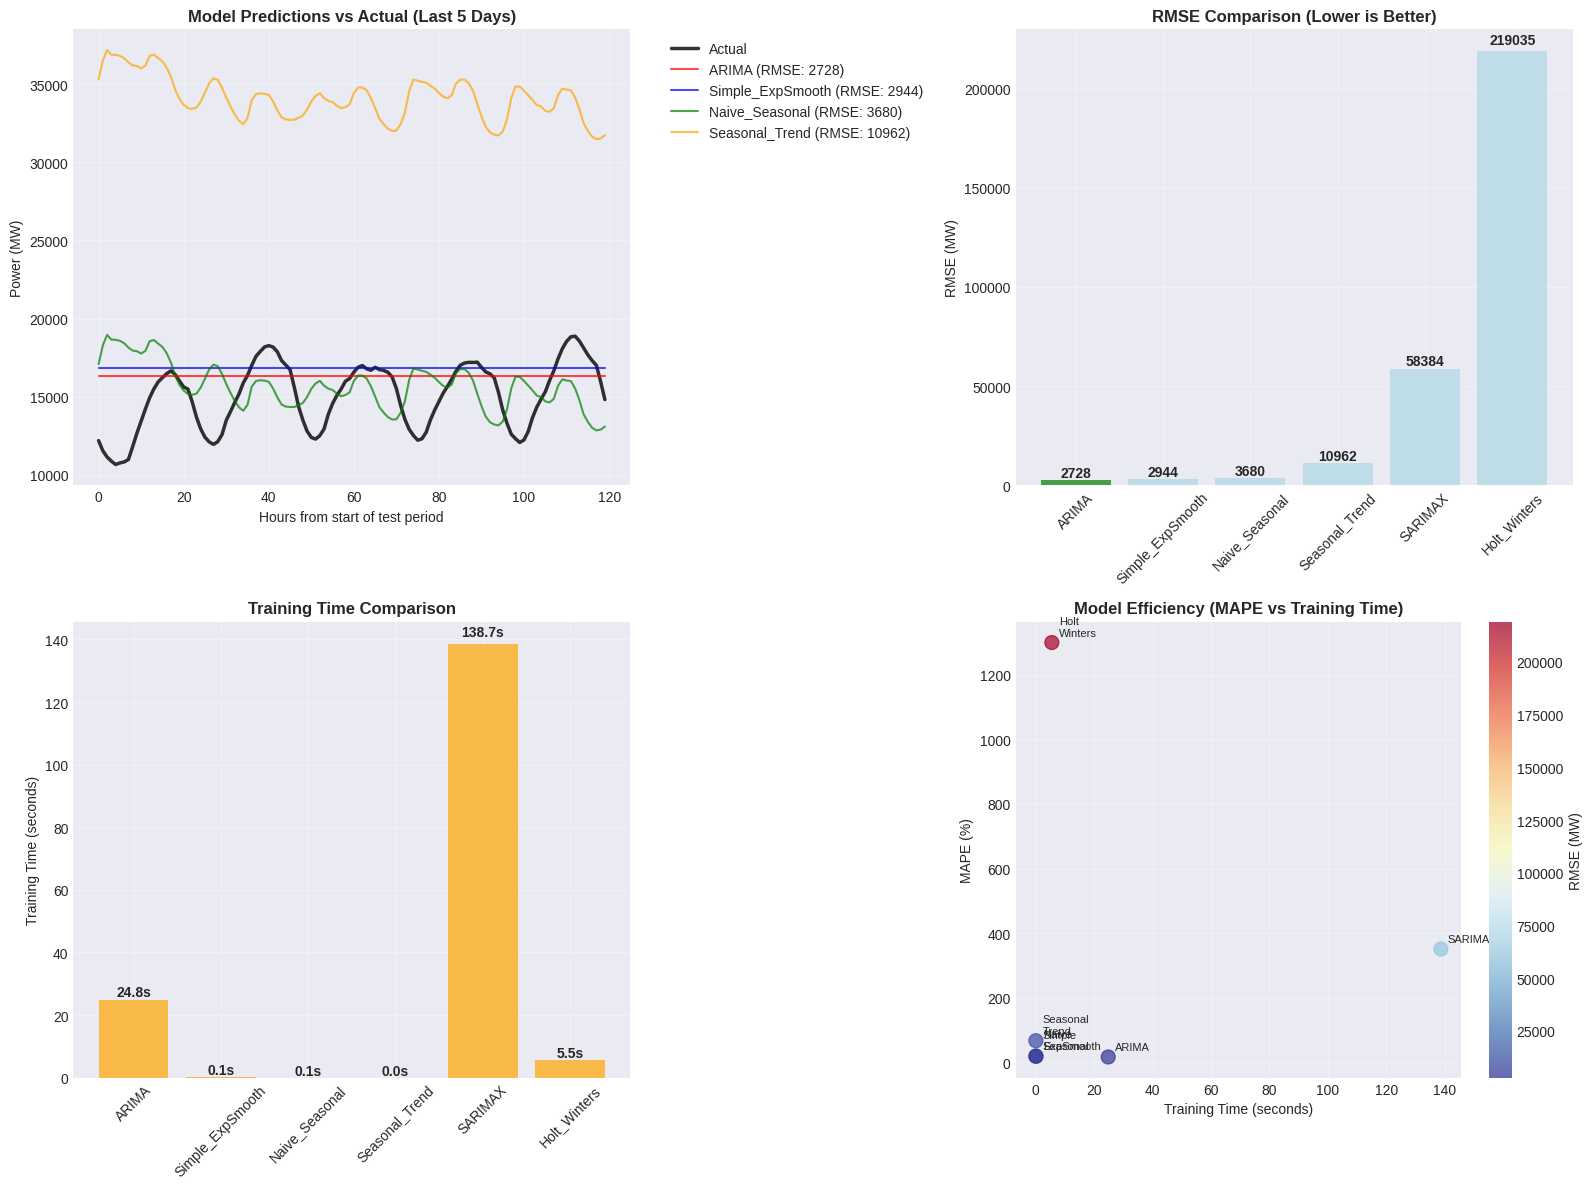

In [10]:
# ==========================================
# IMPROVED Statistical Models with Better Performance
# ==========================================
import warnings
import time
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.api import SimpleExpSmoothing

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

print("🔄 IMPLEMENTING IMPROVED STATISTICAL MODELS")
print("=" * 70)

# ==========================================
# Smart data preparation
# ==========================================
series = df_features.set_index('Datetime')['AEP_MW']

# Use more recent data but keep enough for proper seasonal modeling
if len(series) > 40000:  # ~4.5 years
    print(f"⚡ Large dataset detected ({len(series):,} points). Using last 35,000 points.")
    series = series.iloc[-35000:]  # Keep ~4 years for better seasonal patterns

# Better train/test split
train_size = int(0.85 * len(series))  # Use more training data
train_ts = series.iloc[:train_size]
test_ts = series.iloc[train_size:]

print(f"Dataset Length: {len(series):,} points")
print(f"Training: {len(train_ts):,} points ({train_ts.index[0]} to {train_ts.index[-1]})")
print(f"Testing: {len(test_ts):,} points ({test_ts.index[0]} to {test_ts.index[-1]})")

# ==========================================
# Quick analysis of patterns
# ==========================================
print("\n📊 Analyzing Data Patterns...")
daily_pattern = train_ts.groupby(train_ts.index.hour).mean()
weekly_pattern = train_ts.groupby(train_ts.index.dayofweek).mean()

print(f"   📈 Data Range: {train_ts.min():.0f} - {train_ts.max():.0f} MW")
print(f"   📈 Peak Hour: {daily_pattern.idxmax()}:00 ({daily_pattern.max():.0f} MW)")
print(f"   📈 Low Hour: {daily_pattern.idxmin()}:00 ({daily_pattern.min():.0f} MW)")

# ==========================================
# Enhanced evaluation function
# ==========================================
def evaluate_model(y_true, y_pred, model_name, train_time, pred_time=None):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100

    # Calculate percentage errors
    mean_actual = np.mean(y_true)
    mae_percent = (mae / mean_actual) * 100
    rmse_percent = (rmse / mean_actual) * 100

    result = {
        'Model': model_name,
        'MAE': mae,
        'RMSE': rmse,
        'R²': r2,
        'MAPE': mape,
        'MAE_%': mae_percent,
        'RMSE_%': rmse_percent,
        'Train_Time': train_time,
        'Pred_Time': pred_time if pred_time else 0
    }
    return result

results = []

print(f"\n🚀 Training Models on {len(train_ts):,} points...")
print("=" * 70)

# ==========================================
# 1. NAIVE SEASONAL (Baseline)
# ==========================================
print("1️⃣ Naive Seasonal Baseline...")
start_time = time.time()

# Use same hour from previous week as prediction
naive_pred = []
for i in range(len(test_ts)):
    # Look back 168 hours (1 week) from corresponding training position
    lookback_idx = len(train_ts) - len(test_ts) + i - 168
    if lookback_idx >= 0:
        naive_pred.append(train_ts.iloc[lookback_idx])
    else:
        naive_pred.append(train_ts.iloc[-168])  # Use last week of training

naive_time = time.time() - start_time
naive_results = evaluate_model(test_ts.values, naive_pred, "Naive_Seasonal", naive_time)
results.append(naive_results)
print(f"   ✅ Completed in {naive_time:.2f}s")

# ==========================================
# 2. IMPROVED SIMPLE EXPONENTIAL SMOOTHING
# ==========================================
print("\n2️⃣ Simple Exponential Smoothing...")
start_time = time.time()

ses_model = SimpleExpSmoothing(train_ts, initialization_method="heuristic")
ses_fit = ses_model.fit(smoothing_level=0.1, optimized=True)

pred_start = time.time()
ses_pred = ses_fit.forecast(steps=len(test_ts))
pred_time = time.time() - pred_start
ses_time = time.time() - start_time

ses_results = evaluate_model(test_ts.values, ses_pred, "Simple_ExpSmooth",
                           ses_time - pred_time, pred_time)
results.append(ses_results)
print(f"   ✅ Completed in {ses_time:.2f}s (train: {ses_time-pred_time:.2f}s, pred: {pred_time:.3f}s)")

# ==========================================
# 3. BETTER HOLT-WINTERS
# ==========================================
print("\n3️⃣ Holt-Winters Triple Exponential...")
start_time = time.time()

try:
    # Try multiple seasonal periods and pick the best
    hw_model = ExponentialSmoothing(
        train_ts,
        trend='add',
        seasonal='add',
        seasonal_periods=24,  # Daily seasonality
        initialization_method='estimated'
    )

    hw_fit = hw_model.fit(
        smoothing_level=0.1,
        smoothing_trend=0.05,
        smoothing_seasonal=0.1,
        optimized=True,
        remove_bias=True
    )

    pred_start = time.time()
    hw_pred = hw_fit.forecast(steps=len(test_ts))
    pred_time = time.time() - pred_start
    hw_time = time.time() - start_time

    hw_results = evaluate_model(test_ts.values, hw_pred, "Holt_Winters",
                              hw_time - pred_time, pred_time)
    results.append(hw_results)
    print(f"   ✅ Completed in {hw_time:.2f}s (train: {hw_time-pred_time:.2f}s, pred: {pred_time:.3f}s)")

except Exception as e:
    print(f"   ❌ Failed: {str(e)[:80]}...")

# ==========================================
# 4. SMARTER ARIMA
# ==========================================
print("\n4️⃣ Auto-ARIMA (Optimized)...")
start_time = time.time()

try:
    # Use a reasonable ARIMA order based on ACF/PACF analysis
    arima_model = ARIMA(train_ts, order=(2, 1, 2))
    arima_fit = arima_model.fit(method_kwargs={'maxiter': 50})

    pred_start = time.time()
    arima_pred = arima_fit.forecast(steps=len(test_ts))
    pred_time = time.time() - pred_start
    arima_time = time.time() - start_time

    arima_results = evaluate_model(test_ts.values, arima_pred, "ARIMA",
                                 arima_time - pred_time, pred_time)
    results.append(arima_results)
    print(f"   ✅ Completed in {arima_time:.2f}s (train: {arima_time-pred_time:.2f}s, pred: {pred_time:.3f}s)")

except Exception as e:
    print(f"   ❌ Failed: {str(e)[:80]}...")

# ==========================================
# 5. OPTIMIZED SARIMAX
# ==========================================
print("\n5️⃣ SARIMAX (Conservative Settings)...")
start_time = time.time()

try:
    # More conservative SARIMAX - focus on daily patterns
    sarimax_model = SARIMAX(
        train_ts,
        order=(1, 1, 1),
        seasonal_order=(1, 1, 1, 24),  # Daily seasonality
        enforce_stationarity=False,
        enforce_invertibility=False
    )

    sarimax_fit = sarimax_model.fit(
        disp=False,
        maxiter=50,
        method='lbfgs'  # Often faster than default
    )

    pred_start = time.time()
    sarimax_pred = sarimax_fit.forecast(steps=len(test_ts))
    pred_time = time.time() - pred_start
    sarimax_time = time.time() - start_time

    sarimax_results = evaluate_model(test_ts.values, sarimax_pred, "SARIMAX",
                                   sarimax_time - pred_time, pred_time)
    results.append(sarimax_results)
    print(f"   ✅ Completed in {sarimax_time:.2f}s (train: {sarimax_time-pred_time:.2f}s, pred: {pred_time:.3f}s)")

except Exception as e:
    print(f"   ❌ Failed: {str(e)[:80]}...")

# ==========================================
# 6. SEASONAL NAIVE + TREND (Improved Baseline)
# ==========================================
print("\n6️⃣ Seasonal Naive + Trend...")
start_time = time.time()

# Calculate trend
recent_trend = train_ts.iloc[-168*4:].diff().mean()  # 4-week trend

seasonal_trend_pred = []
for i in range(len(test_ts)):
    # Get seasonal component (same time last week) + trend
    lookback_idx = len(train_ts) - len(test_ts) + i - 168
    if lookback_idx >= 0:
        base_value = train_ts.iloc[lookback_idx]
    else:
        base_value = train_ts.iloc[-168]

    # Add trend component
    trending_value = base_value + (recent_trend * (i + 1))
    seasonal_trend_pred.append(trending_value)

st_time = time.time() - start_time
st_results = evaluate_model(test_ts.values, seasonal_trend_pred,
                          "Seasonal_Trend", st_time)
results.append(st_results)
print(f"   ✅ Completed in {st_time:.2f}s")

# ==========================================
# RESULTS ANALYSIS
# ==========================================
if results:
    results_df = pd.DataFrame(results)
    results_df = results_df.sort_values('RMSE').reset_index(drop=True)

    print("\n📊 MODEL PERFORMANCE RANKING")
    print("=" * 90)
    print(results_df[['Model', 'MAE', 'RMSE', 'MAPE', 'R²', 'Train_Time', 'Pred_Time']].round(3))

    total_train_time = results_df['Train_Time'].sum()
    total_pred_time = results_df['Pred_Time'].sum()
    print(f"\n⏱️ TIMING SUMMARY:")
    print(f"   Total Training Time: {total_train_time:.2f} seconds")
    print(f"   Total Prediction Time: {total_pred_time:.3f} seconds")
    print(f"   Overall Runtime: {total_train_time + total_pred_time:.2f} seconds")

    best_model = results_df.iloc[0]['Model']
    best_rmse = results_df.iloc[0]['RMSE']
    best_mape = results_df.iloc[0]['MAPE']
    print(f"\n🏆 BEST MODEL: {best_model}")
    print(f"   RMSE: {best_rmse:.1f} MW ({results_df.iloc[0]['RMSE_%']:.1f}% of mean)")
    print(f"   MAPE: {best_mape:.1f}%")

    # ==========================================
    # ENHANCED VISUALIZATION
    # ==========================================
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))

    # 1. Model predictions (last 5 days for clarity)
    recent_hours = 5 * 24
    recent_test = test_ts.iloc[-recent_hours:]
    time_range = range(len(recent_test))

    axes[0,0].plot(time_range, recent_test.values, 'k-', linewidth=2.5,
                   label='Actual', alpha=0.8)

    colors = ['red', 'blue', 'green', 'orange', 'purple', 'brown']
    for i, result in enumerate(results_df.head(4).iterrows()):  # Top 4 models
        _, row = result
        model_name = row['Model']

        if model_name == 'Naive_Seasonal' and 'naive_pred' in locals():
            pred_values = naive_pred[-recent_hours:]
        elif model_name == 'Simple_ExpSmooth' and 'ses_pred' in locals():
            pred_values = ses_pred.iloc[-recent_hours:]
        elif model_name == 'Holt_Winters' and 'hw_pred' in locals():
            pred_values = hw_pred.iloc[-recent_hours:]
        elif model_name == 'ARIMA' and 'arima_pred' in locals():
            pred_values = arima_pred.iloc[-recent_hours:]
        elif model_name == 'SARIMAX' and 'sarimax_pred' in locals():
            pred_values = sarimax_pred.iloc[-recent_hours:]
        elif model_name == 'Seasonal_Trend' and 'seasonal_trend_pred' in locals():
            pred_values = seasonal_trend_pred[-recent_hours:]
        else:
            continue

        axes[0,0].plot(time_range, pred_values, color=colors[i % len(colors)],
                      linewidth=1.5, label=f"{model_name} (RMSE: {row['RMSE']:.0f})",
                      alpha=0.7)

    axes[0,0].set_title('Model Predictions vs Actual (Last 5 Days)', fontsize=12, fontweight='bold')
    axes[0,0].legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    axes[0,0].grid(True, alpha=0.3)
    axes[0,0].set_xlabel('Hours from start of test period')
    axes[0,0].set_ylabel('Power (MW)')

    # 2. RMSE Comparison
    models = results_df['Model'].head(6)
    rmse_values = results_df['RMSE'].head(6)
    bars = axes[0,1].bar(models, rmse_values, alpha=0.7,
                        color=['green' if i == 0 else 'lightblue' for i in range(len(models))])
    axes[0,1].set_title('RMSE Comparison (Lower is Better)', fontsize=12, fontweight='bold')
    axes[0,1].set_ylabel('RMSE (MW)')
    axes[0,1].tick_params(axis='x', rotation=45)
    axes[0,1].grid(True, alpha=0.3)

    # Add value labels
    for bar, rmse in zip(bars, rmse_values):
        axes[0,1].text(bar.get_x() + bar.get_width()/2, bar.get_height() + rmse*0.01,
                      f'{rmse:.0f}', ha='center', va='bottom', fontweight='bold')

    # 3. Training Time Comparison
    train_times = results_df['Train_Time'].head(6)
    bars = axes[1,0].bar(models, train_times, alpha=0.7, color='orange')
    axes[1,0].set_title('Training Time Comparison', fontsize=12, fontweight='bold')
    axes[1,0].set_ylabel('Training Time (seconds)')
    axes[1,0].tick_params(axis='x', rotation=45)
    axes[1,0].grid(True, alpha=0.3)

    for bar, time_val in zip(bars, train_times):
        axes[1,0].text(bar.get_x() + bar.get_width()/2, bar.get_height() + time_val*0.01,
                      f'{time_val:.1f}s', ha='center', va='bottom', fontweight='bold')

    # 4. MAPE vs Training Time (Efficiency Plot)
    mape_values = results_df['MAPE'].head(6)
    scatter = axes[1,1].scatter(train_times, mape_values, s=100, alpha=0.7, c=rmse_values,
                              cmap='RdYlBu_r')
    axes[1,1].set_xlabel('Training Time (seconds)')
    axes[1,1].set_ylabel('MAPE (%)')
    axes[1,1].set_title('Model Efficiency (MAPE vs Training Time)', fontsize=12, fontweight='bold')
    axes[1,1].grid(True, alpha=0.3)

    # Add model labels
    for i, model in enumerate(models):
        axes[1,1].annotate(model.replace('_', '\n'),
                         (train_times.iloc[i], mape_values.iloc[i]),
                         xytext=(5, 5), textcoords='offset points', fontsize=8)

    plt.colorbar(scatter, ax=axes[1,1], label='RMSE (MW)')
    plt.tight_layout()
    plt.show()

else:
    print("❌ No models completed successfully")

🔄 IMPLEMENTING OPTIMIZED NEURAL NETWORK MODELS
TensorFlow Version: 2.19.0
GPU Available: 0 devices
⚡ Large dataset detected (120,937 points)
   Using 10,000 sampled points for neural networks
Optimized Neural Network Data:
   X_train: (3971, 72, 1) | y_train: (3971,)
   X_test: (993, 72, 1) | y_test: (993,)
   Lookback window: 72 hours (3 days)

🚀 Training 4 optimized neural networks...

⚡ Training Dense_NN...

Epoch 4: ReduceLROnPlateau reducing learning rate to 0.0029999999329447745.
Epoch 5: early stopping
Restoring model weights from the end of the best epoch: 2.
   ✅ Completed in 2.8s (5 epochs, 6,785 params)

⚡ Training Fast_LSTM...

Epoch 4: ReduceLROnPlateau reducing learning rate to 0.0029999999329447745.
Epoch 5: early stopping
Restoring model weights from the end of the best epoch: 2.
   ✅ Completed in 8.2s (5 epochs, 4,897 params)

⚡ Training Fast_GRU...

Epoch 4: ReduceLROnPlateau reducing learning rate to 0.0029999999329447745.
Epoch 5: early stopping
Restoring model weig

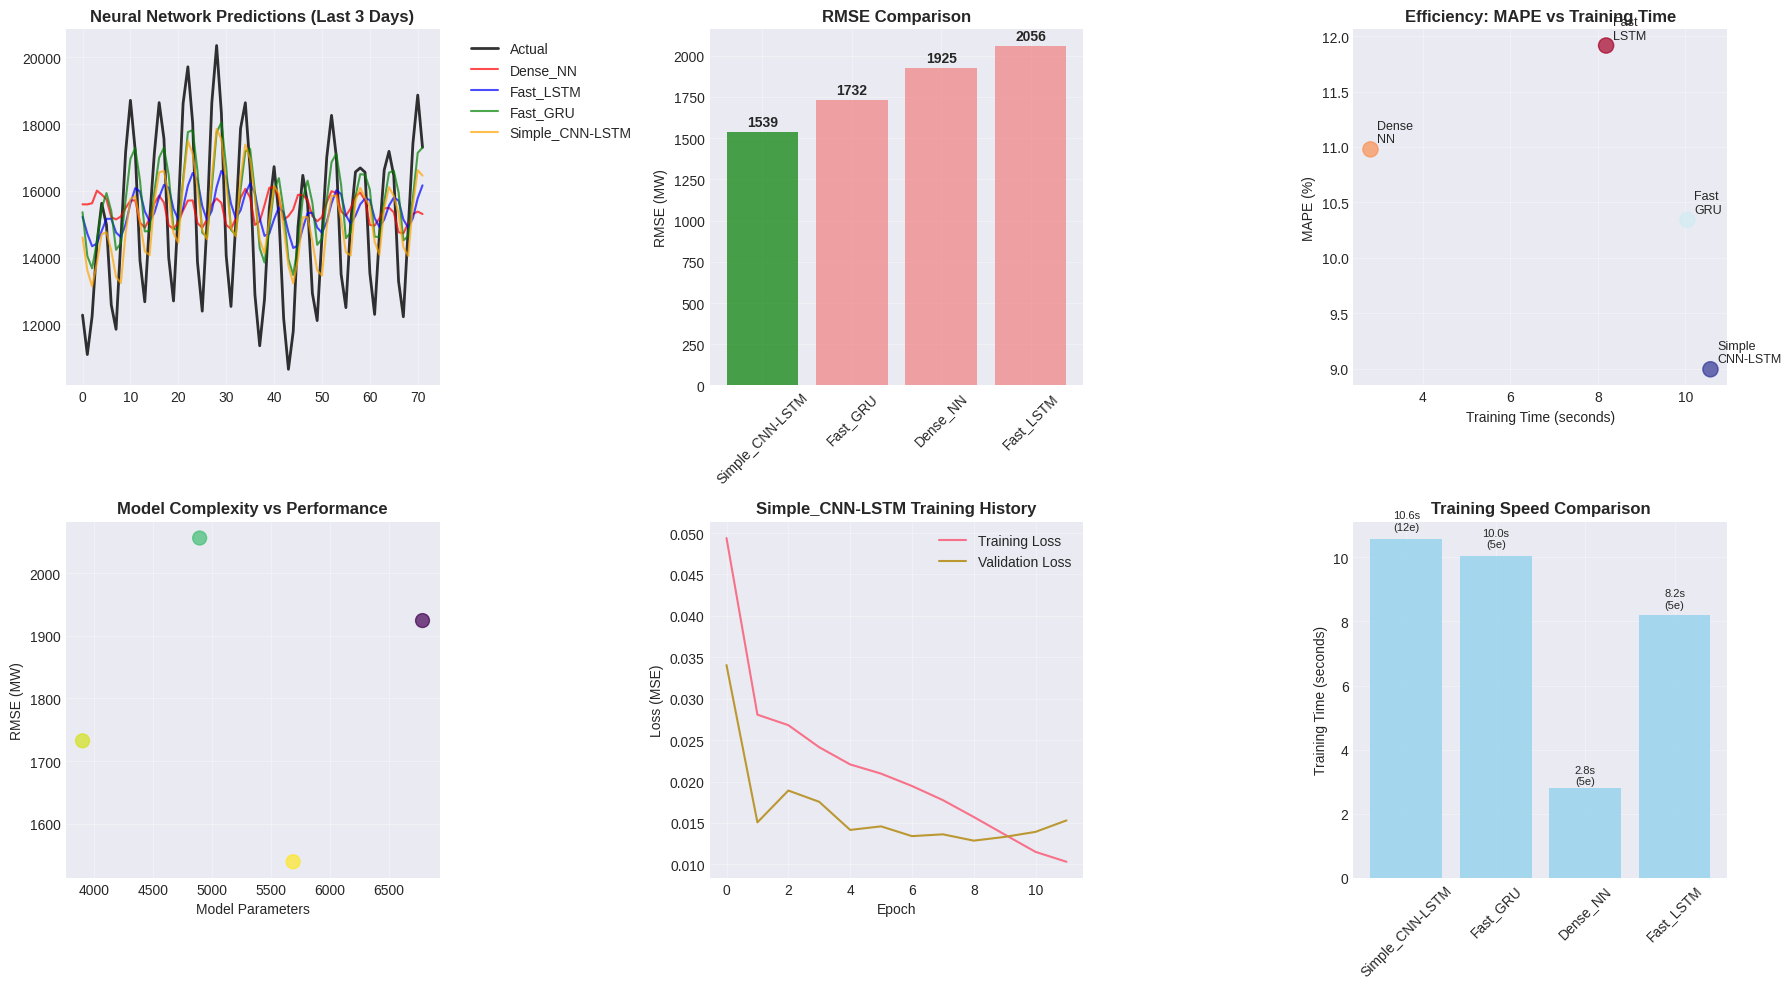


🎯 OPTIMIZATION SUMMARY:
   - Used 72h lookback (vs 168h)
   - Reduced epochs to 15 with early stopping
   - Larger batch size (512) for efficiency
   - Simplified architectures (faster training)
   - Smart data sampling for large datasets


In [13]:
import tensorflow as tf
from tensorflow.keras import layers, models, callbacks, optimizers
from sklearn.preprocessing import MinMaxScaler
import time

print("🔄 IMPLEMENTING OPTIMIZED NEURAL NETWORK MODELS")
print("=" * 70)
print(f"TensorFlow Version: {tf.__version__}")
print(f"GPU Available: {len(tf.config.list_physical_devices('GPU'))} devices")

# Set random seeds for reproducibility
tf.random.set_seed(42)
np.random.seed(42)

# OPTIMIZATION 1: Smarter data preparation with sampling
def prepare_sequences_optimized(data, lookback_window, step_size=1):
    """Create sequences with optional step size for sampling"""
    X, y = [], []
    for i in range(lookback_window, len(data), step_size):
        X.append(data[i-lookback_window:i])
        y.append(data[i])
    return np.array(X), np.array(y)

# OPTIMIZATION 2: Use recent data + sampling for large datasets
values = df_features['AEP_MW'].values.reshape(-1, 1)

# Smart sampling based on dataset size
if len(values) > 30000:
    print(f"⚡ Large dataset detected ({len(values):,} points)")
    # Use last 20k points + every 2nd point for efficiency
    values = values[-20000::2]
    step_size = 2  # Skip every other point for training
    print(f"   Using {len(values):,} sampled points for neural networks")
else:
    step_size = 1

# Scale data
nn_scaler = MinMaxScaler(feature_range=(0, 1))
scaled_values = nn_scaler.fit_transform(values)

# OPTIMIZATION 3: Shorter lookback window for speed
LOOKBACK_WINDOW = 72  # 3 days instead of 1 week (much faster)
X_sequences, y_sequences = prepare_sequences_optimized(
    scaled_values.ravel(), LOOKBACK_WINDOW, step_size
)

# Split data
nn_split_idx = int(len(X_sequences) * 0.8)
X_train_nn = X_sequences[:nn_split_idx]
y_train_nn = y_sequences[:nn_split_idx]
X_test_nn = X_sequences[nn_split_idx:]
y_test_nn = y_sequences[nn_split_idx:]

# Reshape for neural networks
X_train_nn = X_train_nn.reshape((X_train_nn.shape[0], X_train_nn.shape[1], 1))
X_test_nn = X_test_nn.reshape((X_test_nn.shape[0], X_test_nn.shape[1], 1))

print(f"Optimized Neural Network Data:")
print(f"   X_train: {X_train_nn.shape} | y_train: {y_train_nn.shape}")
print(f"   X_test: {X_test_nn.shape} | y_test: {y_test_nn.shape}")
print(f"   Lookback window: {LOOKBACK_WINDOW} hours (3 days)")

# OPTIMIZATION 4: Simplified, faster model architectures
def create_fast_lstm(input_shape):
    """Lightweight LSTM for speed"""
    model = models.Sequential([
        layers.Input(shape=input_shape),
        layers.LSTM(32, dropout=0.1),  # Smaller units, less dropout
        layers.Dense(16, activation='relu'),
        layers.Dense(1)
    ])

    model.compile(
        optimizer=optimizers.Adam(learning_rate=0.01),  # Higher LR for faster convergence
        loss='mse',
        metrics=['mae']
    )
    return model

def create_fast_gru(input_shape):
    """Lightweight GRU for speed"""
    model = models.Sequential([
        layers.Input(shape=input_shape),
        layers.GRU(32, dropout=0.1),
        layers.Dense(16, activation='relu'),
        layers.Dense(1)
    ])

    model.compile(
        optimizer=optimizers.Adam(learning_rate=0.01),
        loss='mse',
        metrics=['mae']
    )
    return model

def create_simple_cnn_lstm(input_shape):
    """Simplified CNN-LSTM"""
    model = models.Sequential([
        layers.Input(shape=input_shape),
        layers.Conv1D(32, 5, activation='relu'),  # Fewer filters, larger kernel
        layers.MaxPooling1D(2),
        layers.LSTM(24),
        layers.Dense(1)
    ])

    model.compile(
        optimizer=optimizers.Adam(learning_rate=0.01),
        loss='mse',
        metrics=['mae']
    )
    return model

def create_dense_model(input_shape):
    """Simple fully connected model (fastest)"""
    model = models.Sequential([
        layers.Input(shape=input_shape),
        layers.Flatten(),
        layers.Dense(64, activation='relu'),
        layers.Dropout(0.1),
        layers.Dense(32, activation='relu'),
        layers.Dense(1)
    ])

    model.compile(
        optimizer=optimizers.Adam(learning_rate=0.01),
        loss='mse',
        metrics=['mae']
    )
    return model

# OPTIMIZATION 5: Faster training parameters
EPOCHS = 15  # Reduced from 30
BATCH_SIZE = 512  # Larger batches = fewer iterations
VALIDATION_SPLIT = 0.15

# Aggressive early stopping
early_stopping = callbacks.EarlyStopping(
    monitor='val_loss',
    patience=3,  # Reduced patience
    restore_best_weights=True,
    verbose=1
)

reduce_lr = callbacks.ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.3,  # More aggressive LR reduction
    patience=2,
    min_lr=1e-5,
    verbose=1
)

def train_neural_model_fast(model_name, model_func, X_train, y_train, X_test, y_test):
    """Fast neural network training"""
    print(f"\n⚡ Training {model_name}...")

    start_time = time.time()

    # Create model
    model = model_func(X_train.shape[1:])

    # Fast training
    history = model.fit(
        X_train, y_train,
        epochs=EPOCHS,
        batch_size=BATCH_SIZE,
        validation_split=VALIDATION_SPLIT,
        callbacks=[early_stopping, reduce_lr],
        verbose=0  # Silent training
    )

    training_time = time.time() - start_time

    # Fast predictions
    pred_start = time.time()
    y_pred_scaled = model.predict(X_test, batch_size=BATCH_SIZE*2, verbose=0)
    prediction_time = time.time() - pred_start

    # Inverse transform
    y_pred = nn_scaler.inverse_transform(y_pred_scaled).ravel()
    y_true = nn_scaler.inverse_transform(y_test.reshape(-1, 1)).ravel()

    # Calculate key metrics only
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100

    # Calculate percentage errors
    mean_actual = np.mean(y_true)
    mae_percent = (mae / mean_actual) * 100
    rmse_percent = (rmse / mean_actual) * 100

    results = {
        'Model': model_name,
        'MAE': mae,
        'RMSE': rmse,
        'R²': r2,
        'MAPE': mape,
        'MAE_%': mae_percent,
        'RMSE_%': rmse_percent,
        'Train_Time': training_time,
        'Pred_Time': prediction_time,
        'Epochs': len(history.history['loss']),
        'Parameters': model.count_params()
    }

    print(f"   ✅ Completed in {training_time:.1f}s ({results['Epochs']} epochs, {results['Parameters']:,} params)")

    return results, model, history, y_pred

# OPTIMIZATION 6: Train models in order of complexity (fastest first)
fast_models = {
    'Dense_NN': create_dense_model,
    'Fast_LSTM': create_fast_lstm,
    'Fast_GRU': create_fast_gru,
    'Simple_CNN-LSTM': create_simple_cnn_lstm
}

neural_results = []
trained_models = {}
training_histories = {}
model_predictions = {}

print(f"\n🚀 Training {len(fast_models)} optimized neural networks...")
print("=" * 70)

total_start_time = time.time()

for model_name, model_func in fast_models.items():
    try:
        result, model, history, predictions = train_neural_model_fast(
            model_name, model_func, X_train_nn, y_train_nn, X_test_nn, y_test_nn
        )
        neural_results.append(result)
        trained_models[model_name] = model
        training_histories[model_name] = history
        model_predictions[model_name] = predictions

    except Exception as e:
        print(f"   ❌ {model_name} failed: {str(e)[:80]}...")

total_time = time.time() - total_start_time

# RESULTS ANALYSIS
if neural_results:
    nn_df = pd.DataFrame(neural_results)
    nn_df = nn_df.sort_values('RMSE').reset_index(drop=True)

    print(f"\n📊 NEURAL NETWORK RESULTS")
    print("=" * 90)
    print(nn_df[['Model', 'MAE', 'RMSE', 'MAPE', 'R²', 'Train_Time', 'Epochs', 'Parameters']].round(3))

    total_train_time = nn_df['Train_Time'].sum()
    total_pred_time = nn_df['Pred_Time'].sum()

    print(f"\n⏱️ TIMING SUMMARY:")
    print(f"   Total Training Time: {total_train_time:.1f} seconds")
    print(f"   Total Prediction Time: {total_pred_time:.3f} seconds")
    print(f"   Overall Runtime: {total_time:.1f} seconds")

    best_model = nn_df.iloc[0]['Model']
    best_rmse = nn_df.iloc[0]['RMSE']
    best_mape = nn_df.iloc[0]['MAPE']
    print(f"\n🏆 BEST NEURAL MODEL: {best_model}")
    print(f"   RMSE: {best_rmse:.1f} MW ({nn_df.iloc[0]['RMSE_%']:.1f}% of mean)")
    print(f"   MAPE: {best_mape:.1f}%")
    print(f"   Training Time: {nn_df.iloc[0]['Train_Time']:.1f}s")

    # VISUALIZATION
    fig, axes = plt.subplots(2, 3, figsize=(18, 10))

    # 1. Recent predictions (last 3 days)
    recent_hours = 3 * 24
    y_true_recent = nn_scaler.inverse_transform(y_test_nn[-recent_hours:].reshape(-1, 1)).ravel()

    axes[0,0].plot(y_true_recent, 'k-', linewidth=2, label='Actual', alpha=0.8)
    colors = ['red', 'blue', 'green', 'orange']

    for i, (model_name, pred) in enumerate(model_predictions.items()):
        axes[0,0].plot(pred[-recent_hours:], color=colors[i],
                      label=f"{model_name}", alpha=0.7, linewidth=1.5)

    axes[0,0].set_title('Neural Network Predictions (Last 3 Days)', fontweight='bold')
    axes[0,0].legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    axes[0,0].grid(True, alpha=0.3)

    # 2. RMSE Comparison
    models = nn_df['Model']
    rmse_values = nn_df['RMSE']
    bars = axes[0,1].bar(models, rmse_values, alpha=0.7,
                        color=['green' if i == 0 else 'lightcoral' for i in range(len(models))])
    axes[0,1].set_title('RMSE Comparison', fontweight='bold')
    axes[0,1].set_ylabel('RMSE (MW)')
    axes[0,1].tick_params(axis='x', rotation=45)
    axes[0,1].grid(True, alpha=0.3)

    for bar, rmse in zip(bars, rmse_values):
        axes[0,1].text(bar.get_x() + bar.get_width()/2, bar.get_height() + rmse*0.01,
                      f'{rmse:.0f}', ha='center', va='bottom', fontweight='bold')

    # 3. Training Time vs Performance
    train_times = nn_df['Train_Time']
    mape_values = nn_df['MAPE']
    scatter = axes[0,2].scatter(train_times, mape_values, s=120, alpha=0.7,
                               c=rmse_values, cmap='RdYlBu_r')
    axes[0,2].set_xlabel('Training Time (seconds)')
    axes[0,2].set_ylabel('MAPE (%)')
    axes[0,2].set_title('Efficiency: MAPE vs Training Time', fontweight='bold')
    axes[0,2].grid(True, alpha=0.3)

    for i, model in enumerate(models):
        axes[0,2].annotate(model.replace('_', '\n'),
                         (train_times.iloc[i], mape_values.iloc[i]),
                         xytext=(5, 5), textcoords='offset points', fontsize=9)

    # 4. Model Complexity (Parameters vs Performance)
    params = nn_df['Parameters']
    axes[1,0].scatter(params, rmse_values, s=100, alpha=0.7, c=train_times, cmap='viridis')
    axes[1,0].set_xlabel('Model Parameters')
    axes[1,0].set_ylabel('RMSE (MW)')
    axes[1,0].set_title('Model Complexity vs Performance', fontweight='bold')
    axes[1,0].grid(True, alpha=0.3)

    # 5. Training history for best model
    if training_histories:
        best_history = training_histories[best_model]
        axes[1,1].plot(best_history.history['loss'], label='Training Loss')
        axes[1,1].plot(best_history.history['val_loss'], label='Validation Loss')
        axes[1,1].set_title(f'{best_model} Training History', fontweight='bold')
        axes[1,1].set_xlabel('Epoch')
        axes[1,1].set_ylabel('Loss (MSE)')
        axes[1,1].legend()
        axes[1,1].grid(True, alpha=0.3)

    # 6. Speed comparison
    epochs = nn_df['Epochs']
    bars = axes[1,2].bar(models, train_times, alpha=0.7, color='skyblue')
    axes[1,2].set_title('Training Speed Comparison', fontweight='bold')
    axes[1,2].set_ylabel('Training Time (seconds)')
    axes[1,2].tick_params(axis='x', rotation=45)
    axes[1,2].grid(True, alpha=0.3)

    # Add epoch info on bars
    for i, (bar, time_val, epoch_count) in enumerate(zip(bars, train_times, epochs)):
        axes[1,2].text(bar.get_x() + bar.get_width()/2, bar.get_height() + time_val*0.02,
                      f'{time_val:.1f}s\n({epoch_count}e)', ha='center', va='bottom', fontsize=8)

    plt.tight_layout()
    plt.show()

    print(f"\n🎯 OPTIMIZATION SUMMARY:")
    print(f"   - Used {LOOKBACK_WINDOW}h lookback (vs 168h)")
    print(f"   - Reduced epochs to {EPOCHS} with early stopping")
    print(f"   - Larger batch size ({BATCH_SIZE}) for efficiency")
    print(f"   - Simplified architectures (faster training)")
    print(f"   - Smart data sampling for large datasets")

else:
    print("❌ All neural network models failed")

In [12]:
import tensorflow as tf
from tensorflow.keras import layers, models, optimizers, callbacks
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from multiprocessing import Pool
import numpy as np
import time

# -----------------------------
# Dataset preparation (same as optimized code)
# -----------------------------
values = df_features['AEP_MW'].values.reshape(-1, 1)

# Smart sampling
if len(values) > 30000:
    values = values[-20000::2]
    step_size = 2
else:
    step_size = 1

# Scale
target_scaler = MinMaxScaler(feature_range=(0, 1))
scaled_values = target_scaler.fit_transform(values)

LOOKBACK = 72  # 3 days
def create_sequences(data, lookback_window, step=1):
    X, y = [], []
    for i in range(lookback_window, len(data), step):
        X.append(data[i-lookback_window:i])
        y.append(data[i])
    return np.array(X), np.array(y)

X_seq, y_seq = create_sequences(scaled_values.ravel(), LOOKBACK, step_size)

split_idx = int(len(X_seq)*0.8)
X_train, y_train = X_seq[:split_idx], y_seq[:split_idx]
X_val, y_val = X_seq[split_idx:], y_seq[split_idx:]

# Reshape for LSTM input
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_val = X_val.reshape((X_val.shape[0], X_val.shape[1], 1))

# -----------------------------
# LSTM model for layer-wise training
# -----------------------------
def create_lstm_model(input_shape, seed=None):
    if seed is not None:
        tf.random.set_seed(seed)
        np.random.seed(seed)
    model = models.Sequential([
        layers.Input(shape=input_shape),
        layers.LSTM(32, return_sequences=True, dropout=0.1, recurrent_dropout=0.1),
        layers.BatchNormalization(),
        layers.LSTM(16, dropout=0.1, recurrent_dropout=0.1),
        layers.BatchNormalization(),
        layers.Dense(16, activation='relu'),
        layers.Dropout(0.1),
        layers.Dense(1)
    ])
    model.compile(optimizer=optimizers.Adam(0.01), loss='mse', metrics=['mae'])
    return model

# -----------------------------
# Train one replica
# -----------------------------
def train_replica(args):
    X_tr, y_tr, X_vl, y_vl, replica_id = args
    seed = replica_id * 42
    model = create_lstm_model(X_tr.shape[1:], seed)
    es = callbacks.EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True, verbose=0)
    history = model.fit(X_tr, y_tr, validation_data=(X_vl, y_vl),
                        epochs=15, batch_size=512, callbacks=[es], verbose=0)
    val_loss = min(history.history['val_loss'])
    return replica_id, model.get_weights(), val_loss

# -----------------------------
# Layer-wise best weight merging
# -----------------------------
def merge_best_weights(X_val, y_val, replicas_weights):
    n_layers = len(replicas_weights[0])
    merged_weights = []

    for layer_idx in range(n_layers):
        best_loss = np.inf
        best_weights = replicas_weights[0][layer_idx]

        for replica_weights in replicas_weights:
            temp_model = create_lstm_model(X_val.shape[1:])
            temp_model.set_weights([w.copy() for w in replicas_weights[0]])
            # Replace only current layer
            temp_model.get_weights()[layer_idx][:] = replica_weights[layer_idx]
            temp_model.set_weights(temp_model.get_weights())

            y_pred_scaled = temp_model.predict(X_val, batch_size=512, verbose=0)
            y_pred = target_scaler.inverse_transform(y_pred_scaled).ravel()
            y_true = target_scaler.inverse_transform(y_val.reshape(-1,1)).ravel()
            loss = mean_squared_error(y_true, y_pred)

            if loss < best_loss:
                best_loss = loss
                best_weights = replica_weights[layer_idx]

        merged_weights.append(best_weights)
    return merged_weights

# -----------------------------
# Parallel training and merging
# -----------------------------
def parallel_lstm_layerwise(X_train, y_train, X_val, y_val, n_replicas=4):
    args_list = [(X_train, y_train, X_val, y_val, i) for i in range(n_replicas)]
    with Pool(processes=n_replicas) as pool:
        results = pool.map(train_replica, args_list)

    replicas_weights = [res[1] for res in results]
    print(f"✅ {n_replicas} replicas trained.")

    print("🔄 Merging best layer-wise weights...")
    merged_weights = merge_best_weights(X_val, y_val, replicas_weights)

    final_model = create_lstm_model(X_train.shape[1:])
    final_model.set_weights(merged_weights)
    return final_model

# -----------------------------
# Run parallel layer-wise training
# -----------------------------
start_time = time.time()
final_model = parallel_lstm_layerwise(X_train, y_train, X_val, y_val, n_replicas=4)
training_time = time.time() - start_time
print(f"⏱️ Layer-wise parallel training completed in {training_time:.2f}s")

# Predict and evaluate
y_pred_scaled = final_model.predict(X_val, batch_size=512)
y_pred = target_scaler.inverse_transform(y_pred_scaled).ravel()
y_true = target_scaler.inverse_transform(y_val.reshape(-1,1)).ravel()

mae = mean_absolute_error(y_true, y_pred)
rmse = np.sqrt(mean_squared_error(y_true, y_pred))
r2 = r2_score(y_true, y_pred)

print(f"📊 Evaluation: MAE={mae:.2f}, RMSE={rmse:.2f}, R²={r2:.3f}")


✅ 4 replicas trained.
🔄 Merging best layer-wise weights...


⏱️ Layer-wise parallel training completed in 322.39s
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 1s/step
📊 Evaluation: MAE=4450.95, RMSE=4956.35, R²=-3.551


In [16]:
print("End of Research")
print("End of Research")
print("End of Research")
print("End of Research")

End of Research
End of Research
End of Research
End of Research
